<a href="https://colab.research.google.com/github/acse-srm3018/mmm_miniclip/blob/main/Part2_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis(EDA) - Part2

## Miniclip Data Science Challenge

***
Raha Moosavi-August 2023

**Objective**

Your challenge is to perform media mix modelling, analyse the impact of different marketing channels on user acquisition and revenue, and optimise the marketing budget allocation to maximise profit.

This project is worked on Google Collaboratory.
The required packages for this notebook are imported when needed.

## Imports

Import the required libraries for data preprocessing and modeling stage.

In [2]:
%pylab inline
import pandas as pd # for manipulating tabular data
import matplotlib.pyplot as plt # for visualisation
import seaborn as sns # for user friendly visualisation
import numpy as np # for numerical python functionality

Populating the interactive namespace from numpy and matplotlib


In [3]:
# Importing the machine learning libraries
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve, precision_recall_curve, average_precision_score
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split # for creating a train and test set
#from sklearn.metrics import plot_confusion_matrix, accuracy_score
from sklearn.utils import resample
from sklearn import metrics

In [4]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


# 1. Classification

## 1.1. Dataset

I will work with the CSV file .

The initial datasets including url, domain and utms. The features of url are extracted and store in the csv file. The working of this can be seen in the '#Feature Extraction.ipynb' file.

The reulted csv file is uploaded to this notebook and stored in the dataframe. Also, the initial dataset read as pandas dataframe


## 1.2 Loading the data

In [5]:
# read the road data from the csv file into a pandas dataframe
data= pd.read_csv("/content/gdrive/MyDrive/task_data.csv")

In [6]:

# view the first 5 rows of the road data tabel along with the columns names
data.head()

Date         Game Media_Channel         Cost  Daily_Total_Revenue  \
0  2014-01-01  8_ball_pool      Facebook  5811.971341         13506.747631   
1  2014-01-02  8_ball_pool      Facebook  5020.698090         14715.633379   
2  2014-01-03  8_ball_pool      Facebook  4843.558951          8508.651408   
3  2014-01-04  8_ball_pool      Facebook  4758.522846         12131.809124   
4  2014-01-05  8_ball_pool      Facebook  6032.254445         11261.778533   

   Daily_Total_Installs  
0                  1832  
1                  1798  
2                  1733  
3                  1669  
4                  1875

## 1.6 Visualisation

Few plots and graphs are displayed to find how the data is distributed and the how features are related to each other.

In [8]:
summary_metrics = data.groupby(['Media_Channel', 'Date']).agg({
    'Daily_Total_Installs': 'sum',
    'Daily_Total_Revenue': 'sum',
    'Cost': 'sum'
}).reset_index()

# Display summary statistics
summary_metrics.head()

Media_Channel        Date  Daily_Total_Installs  Daily_Total_Revenue  \
0      Facebook  2014-01-01                  3995         34026.837182   
1      Facebook  2014-01-02                  3832         35738.369001   
2      Facebook  2014-01-03                  3896         26207.384053   
3      Facebook  2014-01-04                  3670         29077.655012   
4      Facebook  2014-01-05                  3985         28933.661564   

           Cost  
0  13595.784573  
1  12234.539696  
2  12593.073454  
3  10823.621475  
4  12515.344400

In [9]:
# aggregate cost by date
data['Date'] = pd.to_datetime(data['Date'])
df = data.groupby('Date')['Cost'].sum().reset_index()
# Indexing with Time Series Data
df = df.set_index('Date')
df.index

DatetimeIndex(['2014-01-01', '2014-01-02', '2014-01-03', '2014-01-04',
               '2014-01-05', '2014-01-06', '2014-01-07', '2014-01-08',
               '2014-01-09', '2014-01-10',
               ...
               '2017-12-22', '2017-12-23', '2017-12-24', '2017-12-25',
               '2017-12-26', '2017-12-27', '2017-12-28', '2017-12-29',
               '2017-12-30', '2017-12-31'],
              dtype='datetime64[ns]', name='Date', length=1461, freq=None)

In [10]:
# aggregate cost by date
df_revenue = data.groupby('Date')['Daily_Total_Revenue'].sum().reset_index()
# Indexing with Time Series Data
df_revenue = df_revenue.set_index('Date')
df_revenue.index

DatetimeIndex(['2014-01-01', '2014-01-02', '2014-01-03', '2014-01-04',
               '2014-01-05', '2014-01-06', '2014-01-07', '2014-01-08',
               '2014-01-09', '2014-01-10',
               ...
               '2017-12-22', '2017-12-23', '2017-12-24', '2017-12-25',
               '2017-12-26', '2017-12-27', '2017-12-28', '2017-12-29',
               '2017-12-30', '2017-12-31'],
              dtype='datetime64[ns]', name='Date', length=1461, freq=None)

In [11]:
df_revenue['Year'] = pd.DatetimeIndex(df_revenue.index).year
df_revenue['Month']=pd.DatetimeIndex(df_revenue.index).month
#DataFrameTableBuilderNonVerbose['Month'] = pd.DatetimeIndex(df_revenue.index).month

In [12]:
df['Year'] = pd.DatetimeIndex(df.index).year
df['Month']=pd.DatetimeIndex(df.index).month
#data['Weekday Name'] = pd.DatetimeIndex(data.index).weekday_name

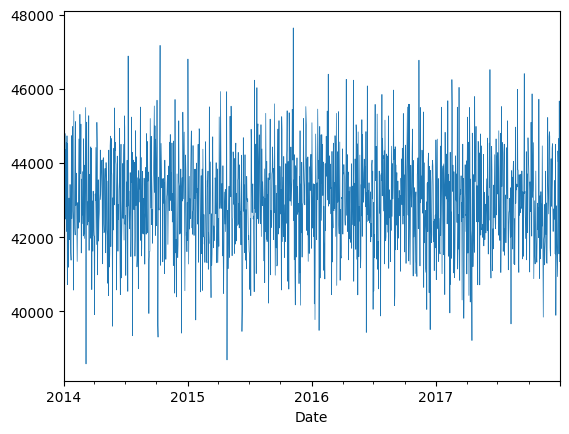

In [13]:
df['Cost'].plot(linewidth=0.5);

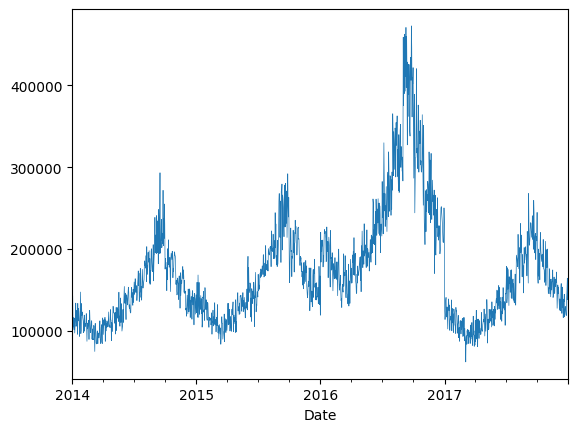

In [14]:
df_revenue['Daily_Total_Revenue'].plot(linewidth=0.5);

<Axes: xlabel='Date'>

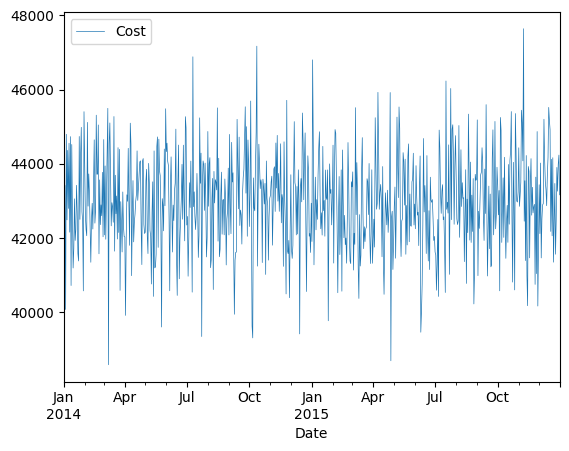

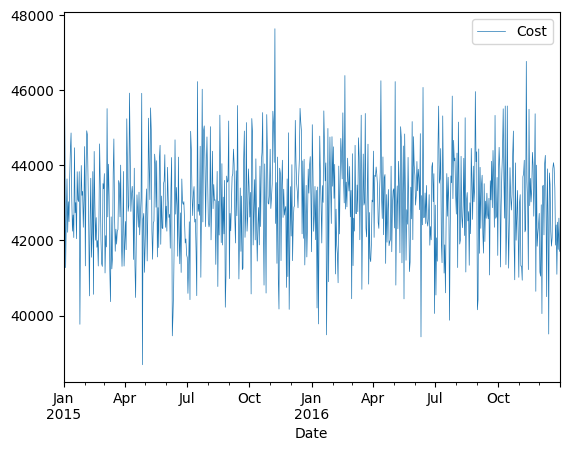

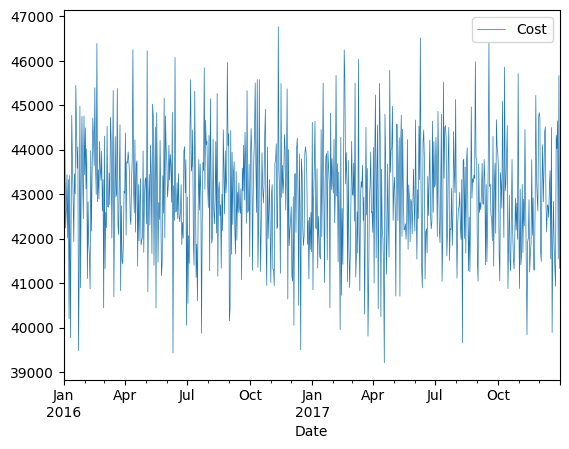

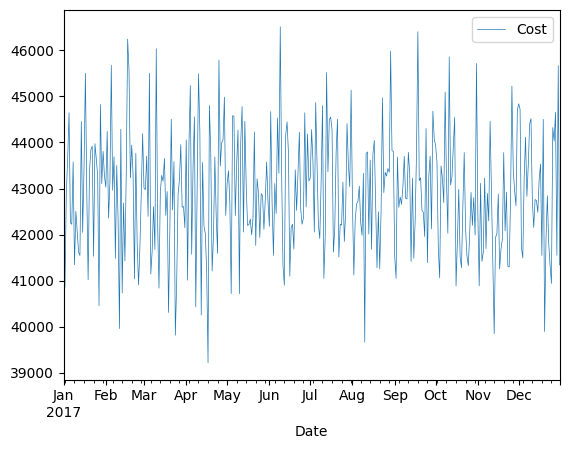

In [15]:
cols_plot = ['Cost']

df.loc['2014':'2015'][cols_plot].plot(linewidth=0.5)
df.loc['2015':'2016'][cols_plot].plot(linewidth=0.5)
df.loc['2016':'2017'][cols_plot].plot(linewidth=0.5)
df.loc['2017':'2018'][cols_plot].plot(linewidth=0.5)

<Axes: xlabel='Date'>

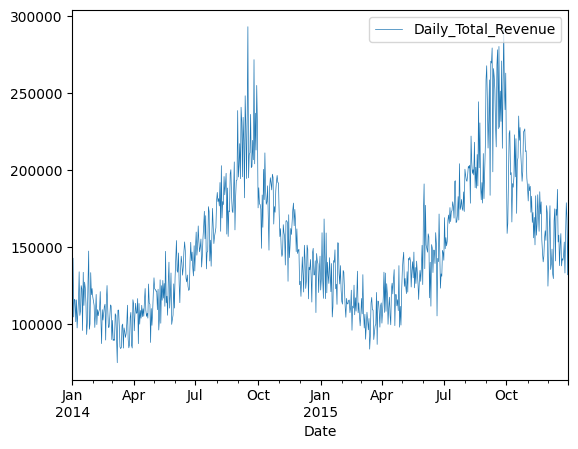

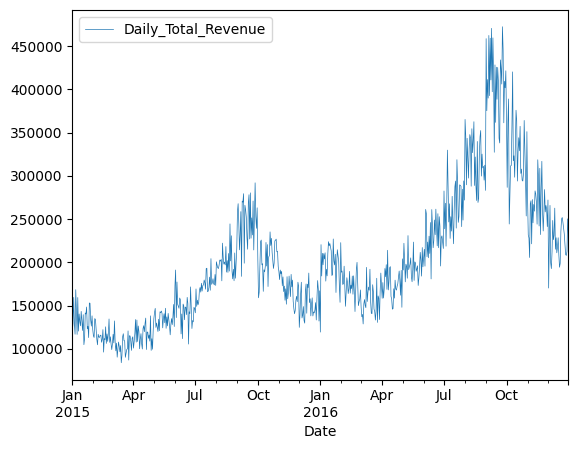

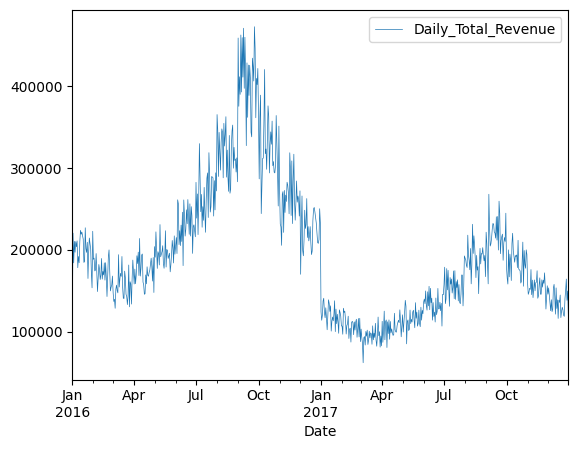

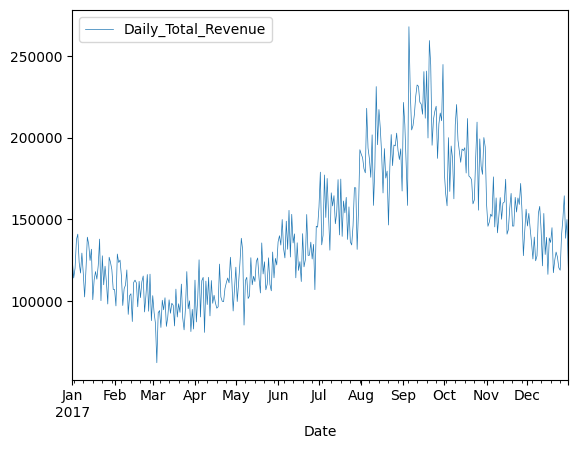

In [16]:
cols_plot = ['Daily_Total_Revenue']

df_revenue.loc['2014':'2015'][cols_plot].plot(linewidth=0.5)
df_revenue.loc['2015':'2016'][cols_plot].plot(linewidth=0.5)
df_revenue.loc['2016':'2017'][cols_plot].plot(linewidth=0.5)
df_revenue.loc['2017':'2018'][cols_plot].plot(linewidth=0.5)

## Check seasonality in data

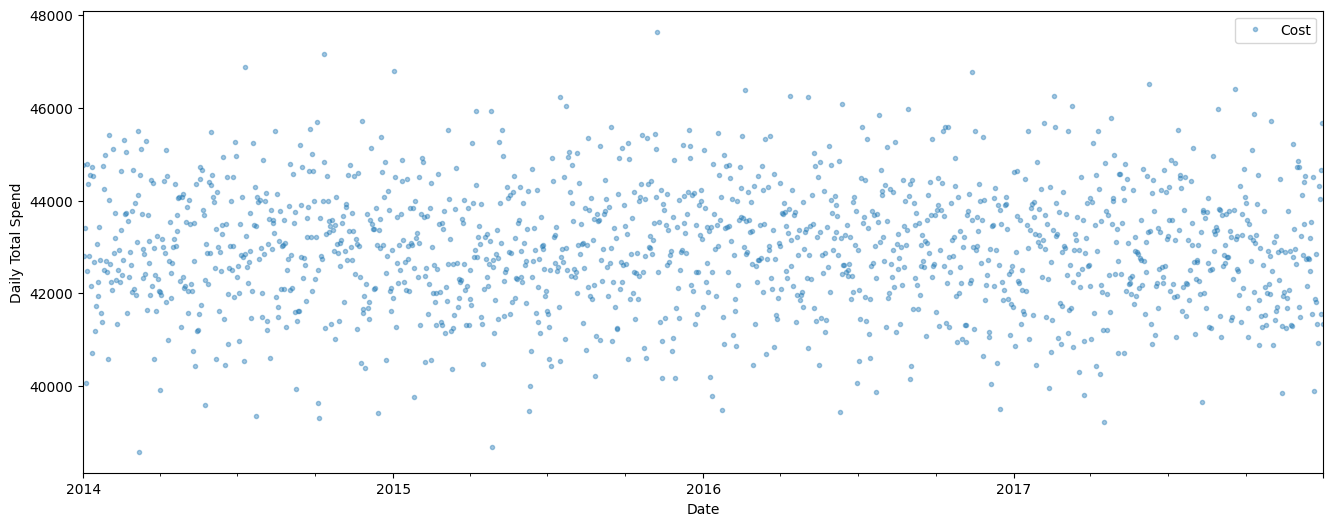

In [17]:
cols_plot = ['Cost']

axes = df[cols_plot].plot(marker='.',
                            alpha=0.4,
                            linestyle='None',
                             figsize=(16, 6),
                             subplots=True)

for ax in axes:
    ax.set_ylabel('Daily Total Spend')

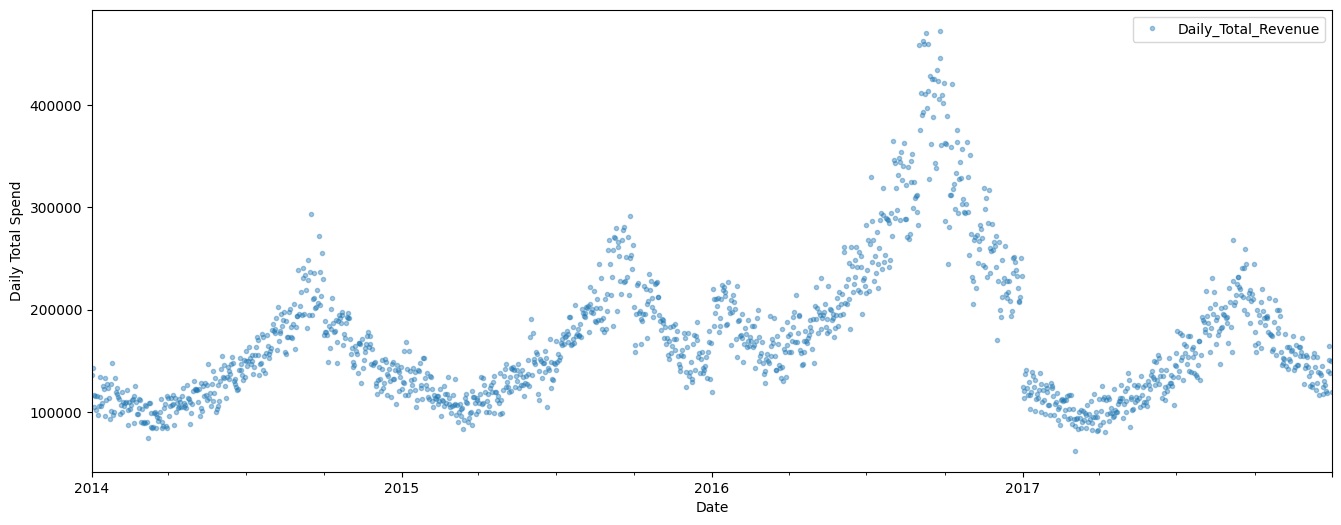

In [18]:
cols_plot = ['Daily_Total_Revenue']

axes = df_revenue[cols_plot].plot(marker='.',
                            alpha=0.4,
                            linestyle='None',
                             figsize=(16, 6),
                             subplots=True)

for ax in axes:
    ax.set_ylabel('Daily Total Spend')

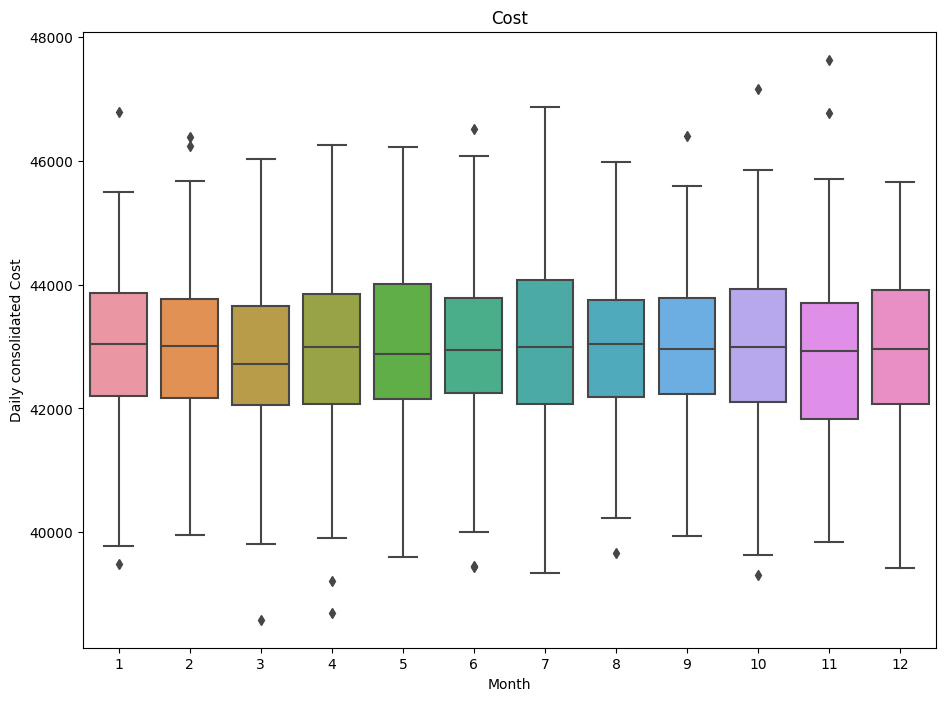

In [19]:
fig, ax = plt.subplots(figsize=(11, 8))

sns.boxplot(data=df, x='Month', y='Cost', ax=ax)

ax.set_title('Cost')

ax.set_ylabel('Daily consolidated Cost');

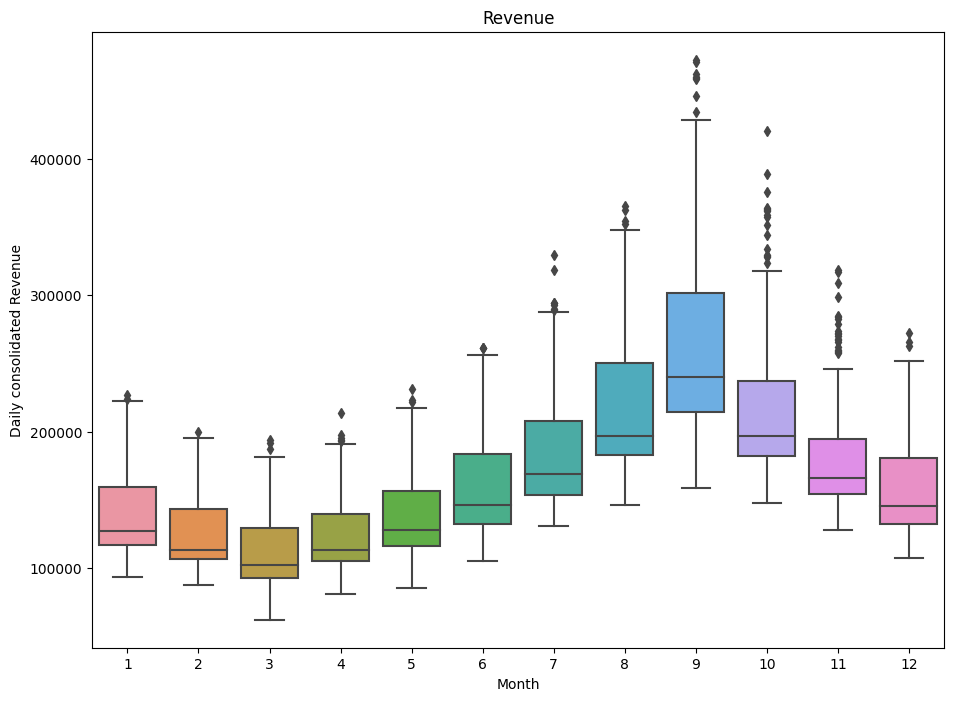

In [20]:
fig, ax = plt.subplots(figsize=(11, 8))

sns.boxplot(data=df_revenue, x='Month', y='Daily_Total_Revenue', ax=ax)

ax.set_title('Revenue')

ax.set_ylabel('Daily consolidated Revenue');

## Observation

the trend, seasonality is not obvious from the above plots for cost, as there are a lots of data points. But it can be seen for revenue!

There seems to indication of seasonality at the September of each year for revenue.

  



In [21]:
# Resample to weekly frequency, aggregating with mean
df_weekly = df['Cost'].resample('W').sum()
df_weekly.head()

Date
2014-01-05    215858.987508
2014-01-12    301801.385476
2014-01-19    297310.799629
2014-01-26    300575.891654
2014-02-02    302761.536117
Freq: W-SUN, Name: Cost, dtype: float64

In [22]:
# Resample to weekly frequency, aggregating with mean
df_weekly_rev = df_revenue['Daily_Total_Revenue'].resample('W').sum()
df_weekly_rev.head()

Date
2014-01-05    615935.627245
2014-01-12    776745.837133
2014-01-19    826328.467358
2014-01-26    802734.080486
2014-02-02    821980.372694
Freq: W-SUN, Name: Daily_Total_Revenue, dtype: float64

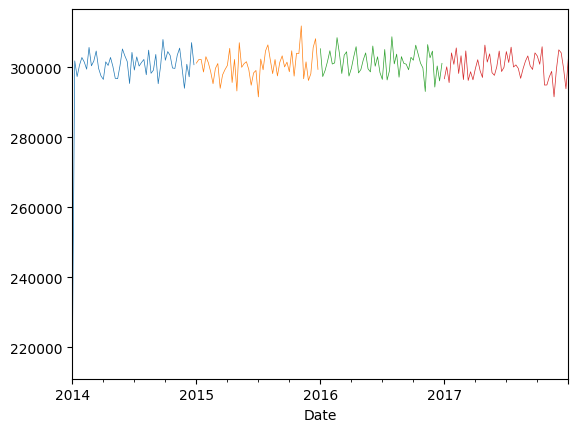

In [23]:
df_weekly.loc['2014'].plot(linewidth=0.5);
df_weekly.loc['2015'].plot(linewidth=0.5);
df_weekly.loc['2016'].plot(linewidth=0.5);
df_weekly.loc['2017'].plot(linewidth=0.5);

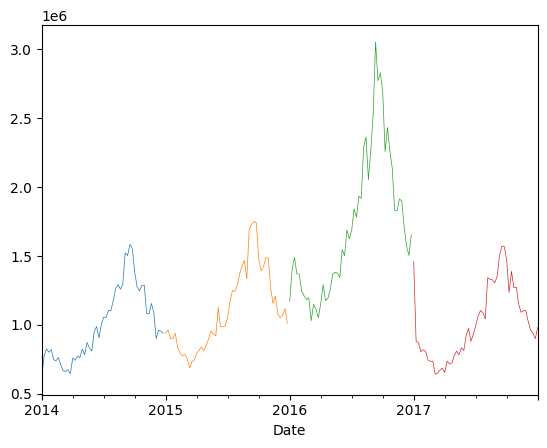

In [24]:
df_weekly_rev.loc['2014'].plot(linewidth=0.5);
df_weekly_rev.loc['2015'].plot(linewidth=0.5);
df_weekly_rev.loc['2016'].plot(linewidth=0.5);
df_weekly_rev.loc['2017'].plot(linewidth=0.5);

In [25]:
# Resample to weekly frequency, aggregating with mean
df_monthly = df['Cost'].resample('M').sum()
df_monthly.head(3)

Date
2014-01-31    1.331668e+06
2014-02-28    1.206841e+06
2014-03-31    1.332340e+06
Freq: M, Name: Cost, dtype: float64

In [26]:
# Resample to weekly frequency, aggregating with mean
df_monthly_rev = df_revenue['Daily_Total_Revenue'].resample('M').sum()
df_monthly_rev.head(3)

Date
2014-01-31    3.616192e+06
2014-02-28    2.997051e+06
2014-03-31    2.959417e+06
Freq: M, Name: Daily_Total_Revenue, dtype: float64

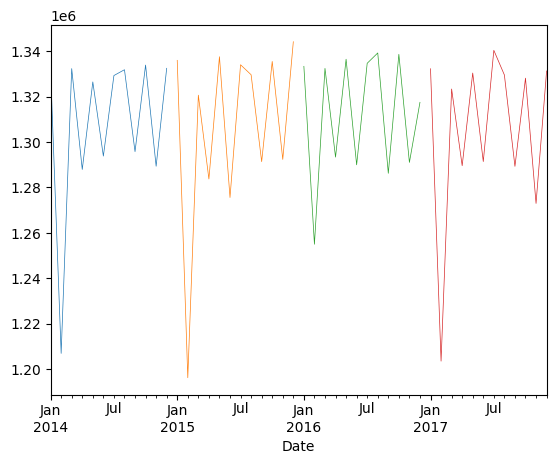

In [27]:
df_monthly.loc['2014'].plot(linewidth=0.5);
df_monthly.loc['2015'].plot(linewidth=0.5);
df_monthly.loc['2016'].plot(linewidth=0.5);
df_monthly.loc['2017'].plot(linewidth=0.5);

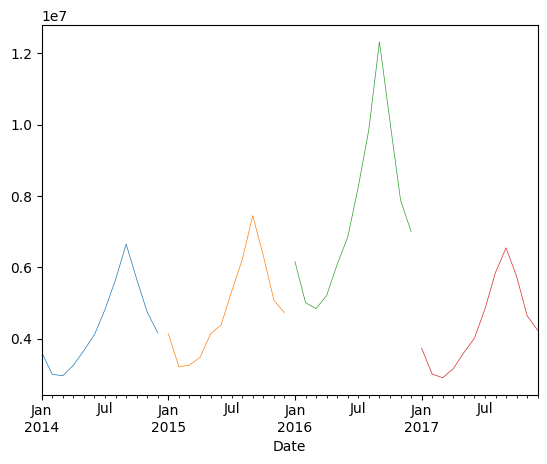

In [28]:
df_monthly_rev.loc['2014'].plot(linewidth=0.5);
df_monthly_rev.loc['2015'].plot(linewidth=0.5);
df_monthly_rev.loc['2016'].plot(linewidth=0.5);
df_monthly_rev.loc['2017'].plot(linewidth=0.5);


###observation
- Cost up in the months of March-May-July
- Cost is lowest in Feburary, indicates seasonality
- In 2016, there is a uptrend visible!
- Revenue is lowest in September, indicates seasonality

In [29]:
# define a function to check trend and plot

def detect_trend (X_df):
    coefficients, residuals, _, _, _ = np.polyfit(range(len(X_df)),
                                                  X_df,
                                                  1,
                                                  full=True)

    mse = residuals[0]/(len(X_df))
    nrmse = np.sqrt(mse)/(X_df.max() - X_df.min())

    print('Slope ' + str(coefficients[0]))
    print('NRMSE: ' + str(nrmse))

    plt.xticks(rotation=90)
    plt.plot(X_df,
             marker='.',
             linestyle='-',
             linewidth=0.5,
             color='blue',
             label='Original')

    plt.plot([coefficients[0]*x + coefficients[1] for x in range(len(X_df))],
             marker='o',
             markersize=8,
             linestyle='-',
             linewidth=0.5,
             color='orange',
             label='Regression line');
    plt.legend()
    plt.show()


Slope 2982.748222009506
NRMSE: 0.26736729041357093


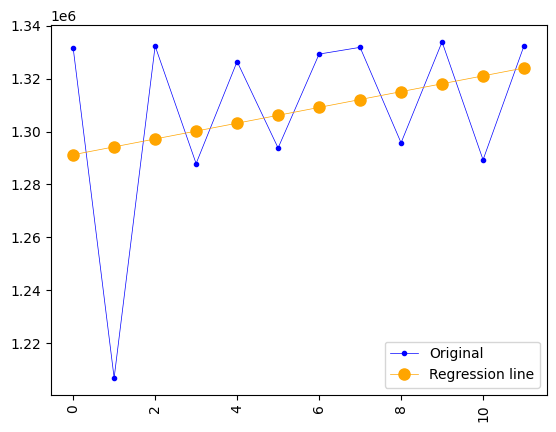

Slope 3961.574040635109
NRMSE: 0.2574755434160815


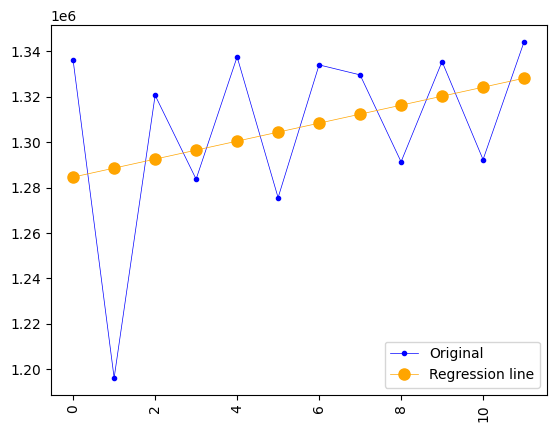

Slope 736.8624227135339
NRMSE: 0.3173832792958703


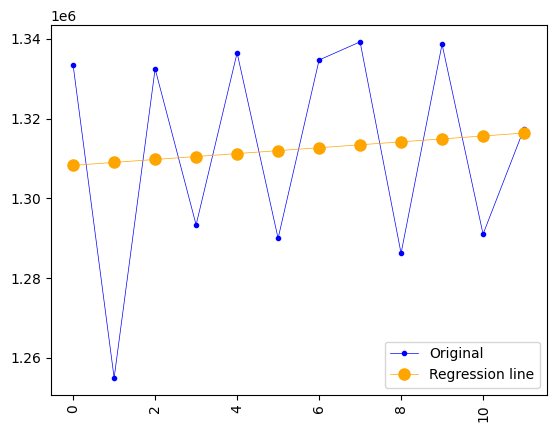

Slope 2422.431259680866
NRMSE: 0.2664983123865978


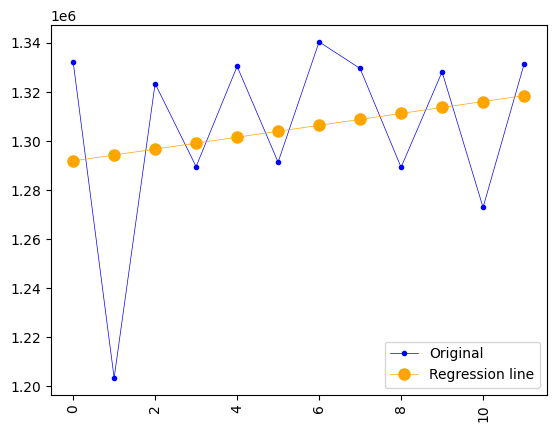

Slope 145.32208172958713
NRMSE: 0.23969051317982518


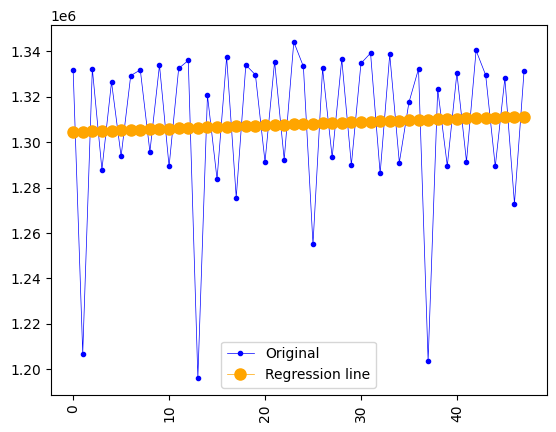

In [30]:
# check for trend
detect_trend(df_monthly.loc['2014'].values)
detect_trend(df_monthly.loc['2015'].values)
detect_trend(df_monthly.loc['2016'].values)
detect_trend(df_monthly.loc['2017'].values)
detect_trend(df_monthly.values)

Slope 224631.96219502055
NRMSE: 0.22050301655110435


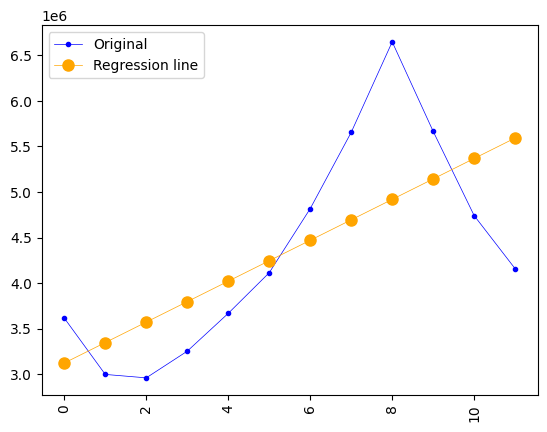

Slope 251278.38655786603
NRMSE: 0.21945474371559032


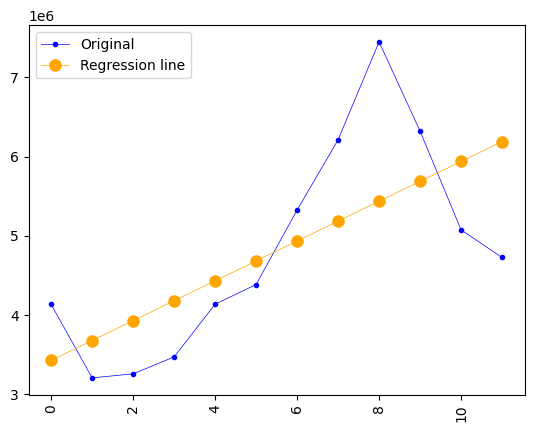

Slope 420532.72493114905
NRMSE: 0.22498017546423366


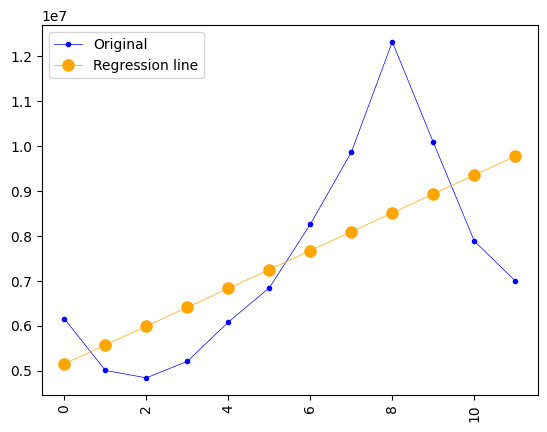

Slope 226032.64652294974
NRMSE: 0.23003415161655252


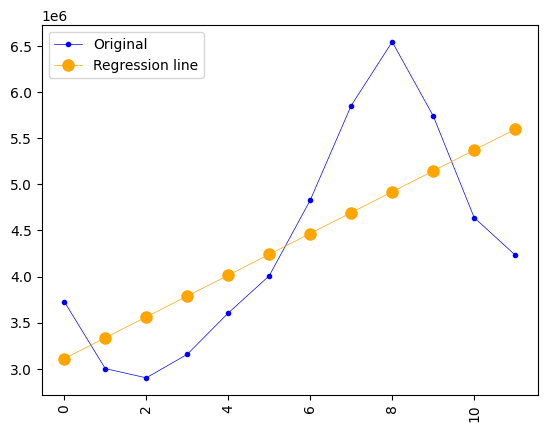

Slope 38103.89536482324
NRMSE: 0.20359744926986487


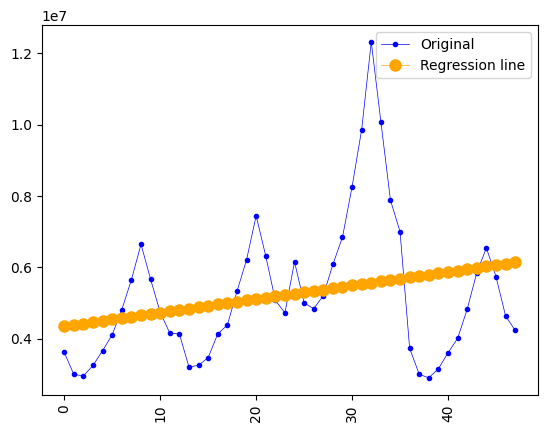

In [31]:
# check for trend
detect_trend(df_monthly_rev.loc['2014'].values)
detect_trend(df_monthly_rev.loc['2015'].values)
detect_trend(df_monthly_rev.loc['2016'].values)
detect_trend(df_monthly_rev.loc['2017'].values)
detect_trend(df_monthly_rev.values)


###observation:

- Trend is more visible in the monthly Cost data
- Revenue picks up in the last QTR of every calender year, indicates slight seasonality
- The time-series has slight seasonality pattern, such as revenue are always low at the beginning of the year and high at the end of the year.r.




Lets see how bad the Time Series is in terms of stationarity:

## (1) Stationarity

  - Data points are often non-stationary or have means, variances and covariances that change over time.

  - Non-stationary behaviors can be trends, cycles, random walks or combinations of the three.

  - Non-stationary data, as a rule, are unpredictable and cannot be modeled or forecasted. The results obtained by using non-stationary time series may be spurious in that they may indicate a relationship between two variables where one does not exist.

  - In order to receive consistent, reliable results, the non-stationary data needs to be transformed into stationary data.

  - A TS is said to be stationary if its statistical properties such as mean, variance remain constant over time.

      - constant mean
      - constant variance
      - an autocovariance that does not depend on time.

  - Though stationarity assumption is taken in many TS models, almost none of practical time series are stationary.

  - Most of the TS models work on the assumption that the TS is stationary.

  - Intuitively, we can say that if a TS has a particular behaviour over time, there is a very high probability that it will follow the same in the future.

Why do we care about stationarity?

  - A stationary time series (TS) is simple to predict as we can assume that future statistical properties are the same or proportional to current statistical properties.

  - Most of the models we use in TSA assume covariance-stationarity (#3 above). This means the descriptive statistics these models predict e.g. means, variances, and correlations, are only reliable if the TS is stationary and invalid otherwise.

  - "For example, if the series is consistently increasing over time, the sample mean and variance will grow with the size of the sample, and they will always underestimate the mean and variance in future periods. And if the mean and variance of a series are not well-defined, then neither are its correlations with other variables."

  - With that said, most TS we encounter in finance is NOT stationary. Therefore a large part of TSA involves identifying if the series we want to predict is stationary, and if it is not we must find ways to transform it such that it is stationary.

check stationarity using the following methods:-

(1) Rolling Plots: review a time series plot ( moving average or moving variance) of the data and visually check if there are any obvious trends or seasonality.

(2) Summary Statistics: review the summary statistics for the data for seasons or random partitions and check for obvious or significant differences.

(3) Statistical Tests: use statistical tests to check if the expectations of stationarity are met or have been violated.

  - Dickey-Fuller Test: This is one of the statistical tests for checking stationarity.

  Here the null hypothesis is that the TS is non-stationary.

  - The test results comprise of a Test Statistic and some Critical Values for difference confidence levels.

  - If the ‘Test Statistic’ is less than the ‘Critical Value’, we can reject the null hypothesis and say that the series is stationary.

Stationarity test : Method 1 : Plots

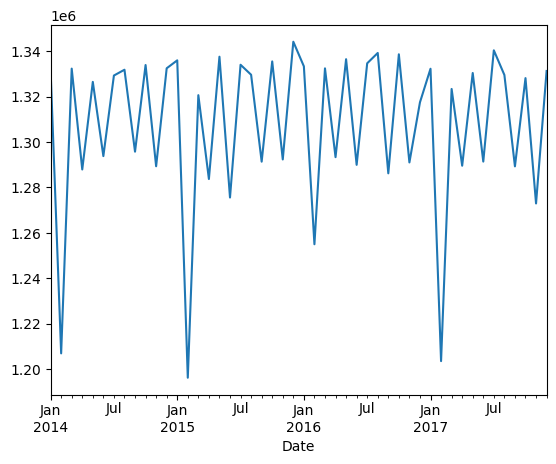

In [32]:
df_monthly.plot();

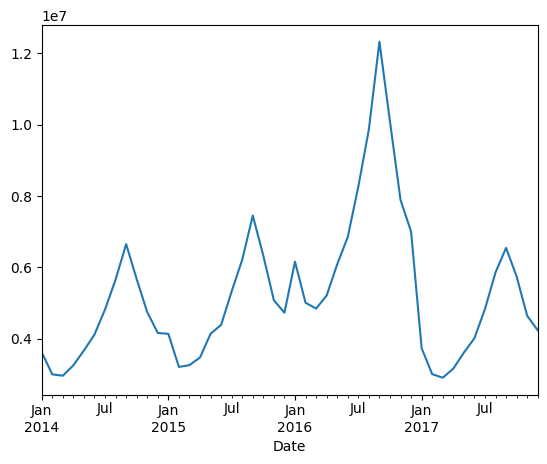

In [33]:
df_monthly_rev.plot();

### Stationarity test : Method 2 : Summary Statistics

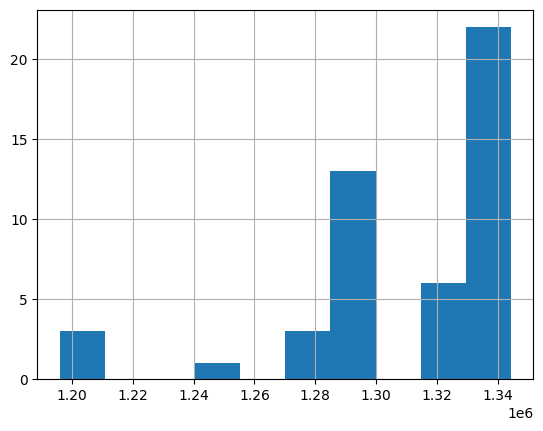

In [34]:
df_monthly.hist();

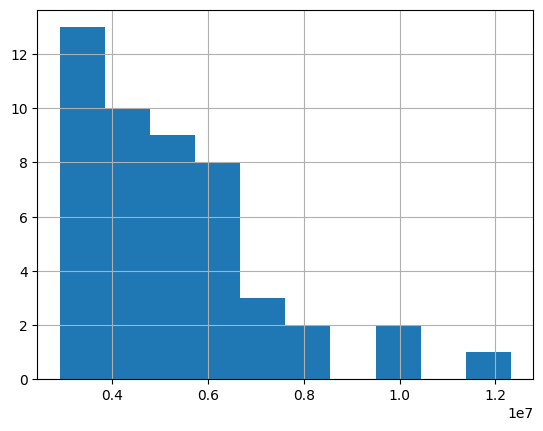

In [35]:
df_monthly_rev.hist();



  - split the time series into 2 contiguous sequences.

  - calculate the mean and variance of each group of numbers and compare the values.



In [36]:
X = df_monthly.values
split = len(X) / 2
split = int(split)

X1, X2 = X[0:split], X[split:]

mean1, mean2 = X1.mean(), X2.mean()
var1,  var2  = X1.var(),  X2.var()

print('mean1     = {:10.2f}, mean2     = {:10.2f}'.format(mean1, mean2))
print('variance1 = {:10.2f}, variance2 = {:10.2f}'.format(var1,  var2))

mean1     = 1307007.80, mean2     = 1308738.42
variance1 = 1450981184.53, variance2 = 1075182380.10


In [38]:
X_rev = df_monthly_rev.values
split = len(X_rev) / 2
split = int(split)

X1_rev, X2_rev = X_rev[0:split], X_rev[split:]

mean1_rev, mean2_rev = X1_rev.mean(), X2_rev.mean()
var1_rev,  var2_rev  = X1_rev.var(),  X2_rev.var()

print('mean1     = {:10.2f}, mean2     = {:10.2f}'.format(mean1_rev, mean2_rev))
print('variance1 = {:10.2f}, variance2 = {:10.2f}'.format(var1_rev,  var2_rev))

mean1     = 4582852.11, mean2     = 5909259.16
variance1 = 1492192737974.30, variance2 = 5544361540788.72



- The mean and variance values are different. But in the same ball-park range.
- Hence the time series is stationary

### Stationarity test : Method 3 : Augmented Dickey-Fuller test - (ADF) test

- The intuition behind the test is that it determines how strongly a time series is defined by a trend. (i.e no stationarity)

- time series is __not stationary __

- time series is stationary

p-value <= 0.05: Reject the null hypothesis (), the data does not have a unit root and is stationary.

p-value > 0.05: Fail to reject the null hypothesis (), the data has a unit root and is non-stationary.

In [39]:
from statsmodels.tsa.stattools import adfuller

for year in np.unique(df.Year):
    #detect_trend(data_grouped.loc[str(year)]['Sales'].values)

    X = df.loc[str(year)]['Cost'].values

    result = adfuller(X)

    print('\nFor the year : ', year)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')

    for key, value in result[4].items():
        print('\t%5s: %8.3f' % (key, value))

X = df['Cost'].values

result = adfuller(X)

print('\nFor the CONSOLIDATED 4 years')
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')

for key, value in result[4].items():
    print('\t%5s: %8.3f' % (key, value))


For the year :  2014
ADF Statistic: -14.351123
p-value: 0.000000
Critical Values:
	   1%:   -3.448
	   5%:   -2.870
	  10%:   -2.571

For the year :  2015
ADF Statistic: -18.016294
p-value: 0.000000
Critical Values:
	   1%:   -3.448
	   5%:   -2.870
	  10%:   -2.571

For the year :  2016
ADF Statistic: -9.915566
p-value: 0.000000
Critical Values:
	   1%:   -3.448
	   5%:   -2.870
	  10%:   -2.571

For the year :  2017
ADF Statistic: -14.594479
p-value: 0.000000
Critical Values:
	   1%:   -3.448
	   5%:   -2.870
	  10%:   -2.571

For the CONSOLIDATED 4 years
ADF Statistic: -21.370045
p-value: 0.000000
Critical Values:
	   1%:   -3.435
	   5%:   -2.864
	  10%:   -2.568


In [40]:
from statsmodels.tsa.stattools import adfuller

for year in np.unique(df_revenue.Year):
    #detect_trend(data_grouped.loc[str(year)]['Sales'].values)

    X = df_revenue.loc[str(year)]['Daily_Total_Revenue'].values

    result = adfuller(X)

    print('\nFor the year : ', year)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')

    for key, value in result[4].items():
        print('\t%5s: %8.3f' % (key, value))

X = df_revenue['Daily_Total_Revenue'].values

result = adfuller(X)

print('\nFor the CONSOLIDATED 4 years')
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')

for key, value in result[4].items():
    print('\t%5s: %8.3f' % (key, value))


For the year :  2014
ADF Statistic: -1.288604
p-value: 0.634370
Critical Values:
	   1%:   -3.449
	   5%:   -2.870
	  10%:   -2.571

For the year :  2015
ADF Statistic: -1.264892
p-value: 0.645077
Critical Values:
	   1%:   -3.449
	   5%:   -2.870
	  10%:   -2.571

For the year :  2016
ADF Statistic: -1.449322
p-value: 0.558416
Critical Values:
	   1%:   -3.449
	   5%:   -2.870
	  10%:   -2.571

For the year :  2017
ADF Statistic: -1.361888
p-value: 0.600405
Critical Values:
	   1%:   -3.449
	   5%:   -2.870
	  10%:   -2.571

For the CONSOLIDATED 4 years
ADF Statistic: -2.339025
p-value: 0.159690
Critical Values:
	   1%:   -3.435
	   5%:   -2.864
	  10%:   -2.568


### Conclusion

Consolidated years - p-value is less than .05 or .01. hence H0 can be rejected.

H0 : Not stationary
Means TS is stationary
Yearly- p-value method : p-value is

0.05 so we reject the null hypothesis for yearly TS


A unit root suggests that a time series is non-stationary, meaning it has a trend and might not be suitable for certain types of analyses. The ADF test helps determine whether a time series is stationary or not.

## Revenue
Here's an interpretation for revenue:
- Year: 2014

  - ADF Statistic: -1.288604
  - p-value: 0.634370
  - Critical Values (1%, 5%, 10%): -3.449, -2.870, -2.571

The p-value (0.634370) is larger than common significance levels (e.g., 0.05), indicating that you fail to reject the null hypothesis. This suggests that the time series data for the year 2014 likely contains a unit root and is non-stationary. The ADF statistic is less negative than the critical values.

- Year: 2015
  - ADF Statistic: -1.264892
  - p-value: 0.645077
  - Critical Values (1%, 5%, 10%): -3.449, -2.870, -2.571

Similar to 2014, the p-value (0.645077) is larger than common significance levels, indicating non-rejection of the null hypothesis. The ADF statistic is less negative than the critical values, suggesting non-stationarity for the time series data in 2015.

- Year: 2016
  - ADF Statistic: -1.449322
  - p-value: 0.558416
  - Critical Values (1%, 5%, 10%): -3.449, -2.870, -2.571

Again, the p-value (0.558416) is higher than common significance levels, indicating non-stationarity. The ADF statistic remains less negative than the critical values.

- Year: 2017
  - ADF Statistic: -1.361888
  - p-value: 0.600405
  - Critical Values (1%, 5%, 10%): -3.449, -2.870, -2.571

Once more, the p-value (0.600405) suggests non-stationarity, as it's greater than typical significance levels.

- Consolidated 4 Years
  - ADF Statistic: -2.339025
  - p-value: 0.159690
  - Critical Values (1%, 5%, 10%): -3.435, -2.864, -2.568

In this case, the p-value (0.159690) is relatively low compared to the other years, but it's still higher than a significance level of 0.05. The ADF statistic is more negative but still not beyond the critical values.

Based on these results, it appears that the time series data for each year (2014, 2015, 2016, 2017) and the consolidated four years are likely non-stationary, indicating the presence of trends. This could impact the suitability of certain time series analyses, and you might need to consider methods to make the data stationary before proceeding with certain modeling techniques. Additionally, if stationarity is a concern, differencing or other transformations could be considered to achieve stationarity and make the data more amenable to analysis.


======================================================================
## Cost

- Year: 2014
        ADF Statistic: -14.351123
        p-value: 0.000000
        Critical Values (1%, 5%, 10%): -3.448, -2.870, -2.571

    The p-value is very close to zero (0.000000), which is less than any common significance level (e.g., 0.05). This suggests strong evidence to reject the null hypothesis. Therefore, the time series data for the year 2014 is likely stationary, indicating the absence of a unit root or trend.

- Year: 2015
        ADF Statistic: -18.016294
        p-value: 0.000000
        Critical Values (1%, 5%, 10%): -3.448, -2.870, -2.571

    Similar to 2014, the p-value is very close to zero (0.000000), indicating strong evidence against the null hypothesis. The time series data for the year 2015 is also likely stationary.

- Year: 2016
        ADF Statistic: -9.915566
        p-value: 0.000000
        Critical Values (1%, 5%, 10%): -3.448, -2.870, -2.571

    Once again, the p-value is close to zero (0.000000), suggesting stationarity for the time series data in 2016.

- Year: 2017
        ADF Statistic: -14.594479
        p-value: 0.000000
        Critical Values (1%, 5%, 10%): -3.448, -2.870, -2.571

    The p-value is close to zero (0.000000), indicating stationarity for the time series data in 2017.

- Consolidated 4 Years
        ADF Statistic: -21.370045
        p-value: 0.000000
        Critical Values (1%, 5%, 10%): -3.435, -2.864, -2.568

    Similar to the individual years, the p-value is very close to zero (0.000000), indicating stationarity for the consolidated time series data over the four years.

Based on these results, it appears that all the years and the consolidated four-year period exhibit stationary behavior. This is an important finding as it indicates that the time series data may be suitable for certain time series analyses and modeling techniques that assume stationarity. However, keep in mind that while stationarity is a necessary condition for some analyses, other aspects of the data (such as trends, seasonality, etc.) should also be considered when choosing appropriate modeling techniques.


Making TS stationary:

** define a function to test stationarity **


In [41]:
def test_stationarity(timeseries, reduced_timeseries=None, smoothing_type='R'):

    # Plot rolling statistics:
    orig = plt.plot(timeseries,
                    marker='.',
                    linestyle='-',
                    linewidth=0.5,
                    color='blue',
                    label='Original')

    mean = plt.plot(reduced_timeseries,
                    marker='.',
                    linestyle='-',
                    linewidth=0.5,
                    color='red',
                    label='Reduced')

    if smoothing_type == 'R':
        title = 'Smoothing by Rolling MA'
    elif smoothing_type == 'E':
        title = 'Smoothing by Exponential weighted MA'
    else:
        title = 'Default MA'

    plt.legend(loc='best')
    plt.title(title)
    plt.show(block=False)

    # Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(reduced_timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])

    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value

    print (dfoutput)


## Reduce noise

- Aggregation – taking average for a time period like monthly/weekly averages

- Smoothing – taking rolling averages (Moving average)

- Polynomial Fitting – fit a regression model


1. Smoothing - Moving average

In this approach, we take average of ‘k’ consecutive values depending on the frequency of time series. Here we can take the average over the past 1 year, i.e. last 12 values. Pandas has specific functions defined for determining rolling statistics.

In [42]:
tc=df_monthly

In [43]:
tr=df_monthly_rev

In [44]:
moving_avg = tc.rolling(window=12).mean()
moving_avg.head()

Date
2014-01-31   NaN
2014-02-28   NaN
2014-03-31   NaN
2014-04-30   NaN
2014-05-31   NaN
Freq: M, Name: Cost, dtype: float64

In [45]:
moving_avg_rev = tr.rolling(window=12).mean()
moving_avg_rev.head()

Date
2014-01-31   NaN
2014-02-28   NaN
2014-03-31   NaN
2014-04-30   NaN
2014-05-31   NaN
Freq: M, Name: Daily_Total_Revenue, dtype: float64

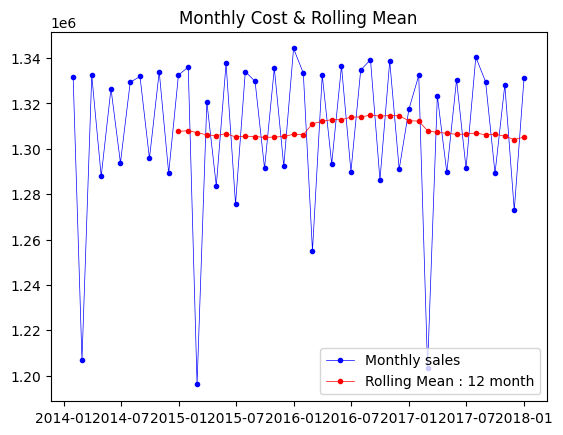

In [46]:
plt.plot(tc, marker='.', linestyle='-', linewidth=0.5, label='Monthly sales', c='b')
plt.plot(moving_avg, marker='.', linestyle='-', linewidth=0.5, color='red', label='Rolling Mean : 12 month');

plt.legend(loc='best')
plt.title('Monthly Cost & Rolling Mean');

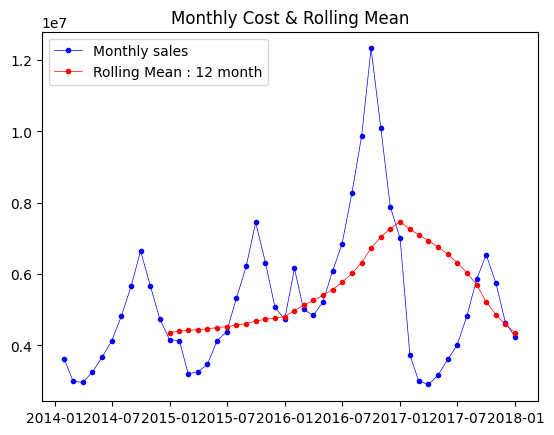

In [47]:
plt.plot(tr, marker='.', linestyle='-', linewidth=0.5, label='Monthly sales', c='b')
plt.plot(moving_avg_rev, marker='.', linestyle='-', linewidth=0.5, color='red', label='Rolling Mean : 12 month');

plt.legend(loc='best')
plt.title('Monthly Cost & Rolling Mean');

In [48]:
ts_moving_avg_diff = tc - moving_avg
ts_moving_avg_diff.head(12)

Date
2014-01-31            NaN
2014-02-28            NaN
2014-03-31            NaN
2014-04-30            NaN
2014-05-31            NaN
2014-06-30            NaN
2014-07-31            NaN
2014-08-31            NaN
2014-09-30            NaN
2014-10-31            NaN
2014-11-30            NaN
2014-12-31    24849.04749
Freq: M, Name: Cost, dtype: float64

In [49]:
tr_moving_avg_diff = tr - moving_avg_rev
tr_moving_avg_diff.head(12)

Date
2014-01-31              NaN
2014-02-28              NaN
2014-03-31              NaN
2014-04-30              NaN
2014-05-31              NaN
2014-06-30              NaN
2014-07-31              NaN
2014-08-31              NaN
2014-09-30              NaN
2014-10-31              NaN
2014-11-30              NaN
2014-12-31   -200260.716445
Freq: M, Name: Daily_Total_Revenue, dtype: float64

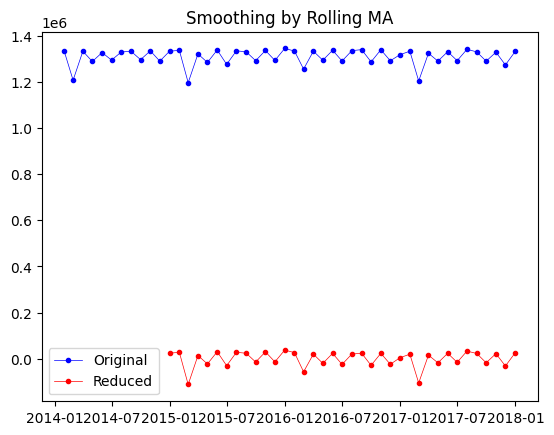

Results of Dickey-Fuller Test:
Test Statistic                -9.269850e+00
p-value                        1.335930e-15
#Lags Used                     0.000000e+00
Number of Observations Used    3.600000e+01
Critical Value (1%)           -3.626652e+00
Critical Value (5%)           -2.945951e+00
Critical Value (10%)          -2.611671e+00
dtype: float64


In [50]:
ts_moving_avg_diff.dropna(inplace=True)
test_stationarity(tc, ts_moving_avg_diff, 'R')

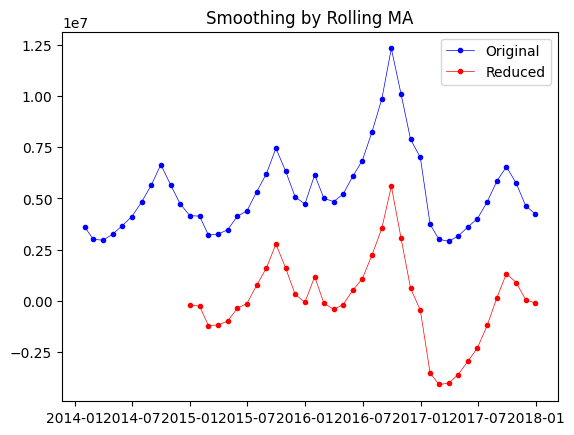

Results of Dickey-Fuller Test:
Test Statistic                 -2.815666
p-value                         0.056071
#Lags Used                      1.000000
Number of Observations Used    35.000000
Critical Value (1%)            -3.632743
Critical Value (5%)            -2.948510
Critical Value (10%)           -2.613017
dtype: float64


In [51]:
tr_moving_avg_diff.dropna(inplace=True)
test_stationarity(tr, tr_moving_avg_diff, 'R')

###Observation

#### Cost
  - The rolling values appear to be varying slightly but there is no specific trend.
  - Also, the test statistic is smaller than the 5% critical values so we can say with 95% confidence that this is a stationary series.
#### Revenue
- The p-value is 0.056071.
- This p-value is greater than a typical significance level of 0.05. When the p-value is high (greater than the chosen significance level), it suggests that  do not have enough evidence to reject the null hypothesis.

###conclusion

#### cost
- p-value method : p-value of 1.3e-15 is

0.05 so we REJECT the null hypothesis. The null hypothesis is : the TS is NON-STATTIONARY. Hence it is proved that TS is stationary

Critical value : Our statistic value of -9.2698 is more than the value of 3.24849 at 1%. So this falls in the rejection region. Hence we REJECT the null hypothesis. i.e TS is stationary

#### Revenue
Based on the test results, the p-value is relatively close to the significance level of 0.05. While it's not significantly lower, the test statistic is also not strongly negative. This suggests that you do not have strong evidence to reject the null hypothesis. Therefore, you might consider the time series to be non-stationary.

2. exponentially weighted moving average

In [52]:
ewma = pd.Series.ewm

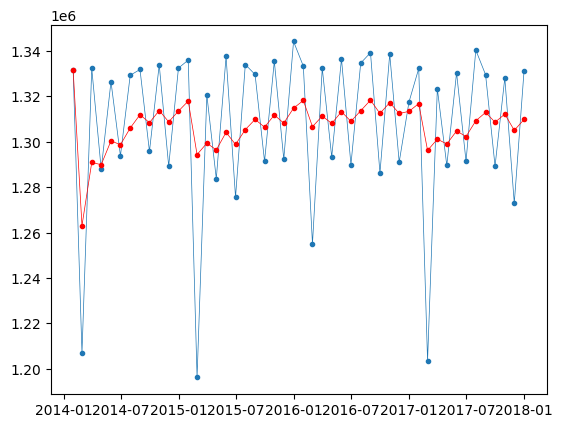

In [53]:
fwd_exp_weighted_avg = ewma(tc, span=10).mean()

plt.plot(tc, marker='.', linestyle='-', linewidth=0.5,)
plt.plot(fwd_exp_weighted_avg, marker='.', linestyle='-', linewidth=0.5, color='red');

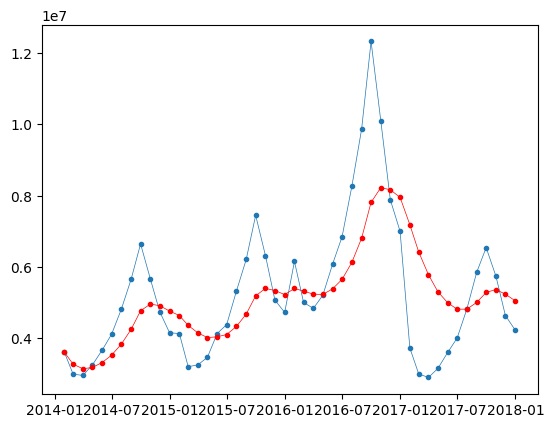

In [54]:
fwd_exp_weighted_avg = ewma(tr, span=10).mean()

plt.plot(tr, marker='.', linestyle='-', linewidth=0.5,)
plt.plot(fwd_exp_weighted_avg, marker='.', linestyle='-', linewidth=0.5, color='red');

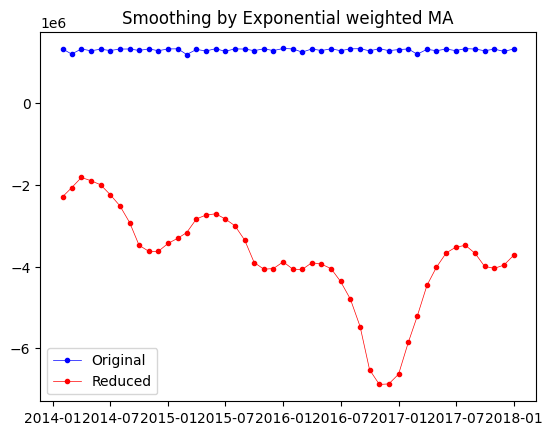

Results of Dickey-Fuller Test:
Test Statistic                 -3.225031
p-value                         0.018581
#Lags Used                      1.000000
Number of Observations Used    46.000000
Critical Value (1%)            -3.581258
Critical Value (5%)            -2.926785
Critical Value (10%)           -2.601541
dtype: float64


In [55]:
ts_ewma_diff = tc - fwd_exp_weighted_avg
test_stationarity(tc, ts_ewma_diff, 'E')

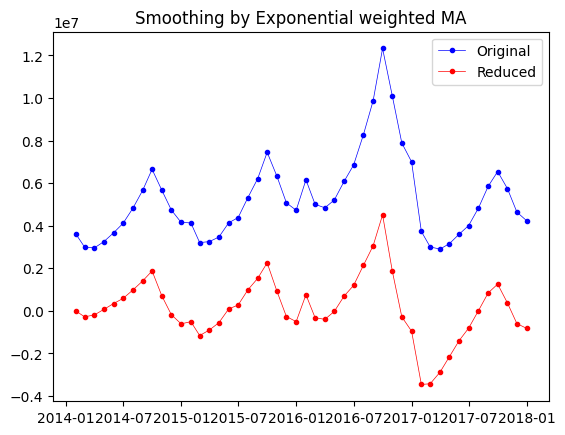

Results of Dickey-Fuller Test:
Test Statistic                 -3.955418
p-value                         0.001663
#Lags Used                      3.000000
Number of Observations Used    44.000000
Critical Value (1%)            -3.588573
Critical Value (5%)            -2.929886
Critical Value (10%)           -2.603185
dtype: float64


In [56]:
tr_ewma_diff = tr - fwd_exp_weighted_avg
test_stationarity(tr, tr_ewma_diff, 'E')


### Decomposition of a time series into its components(trend, seasonality,noise):

You can do a classical decomposition of a time series by considering the series as an additive or multiplicative combination of the base level, trend, seasonal index and the residual.

The seasonal_decompose in statsmodels implements this conveniently.

visualize our data using a method called time-series decomposition that allows us to decompose our time series into 3 distinct components: - trend, - seasonality, and - noise.


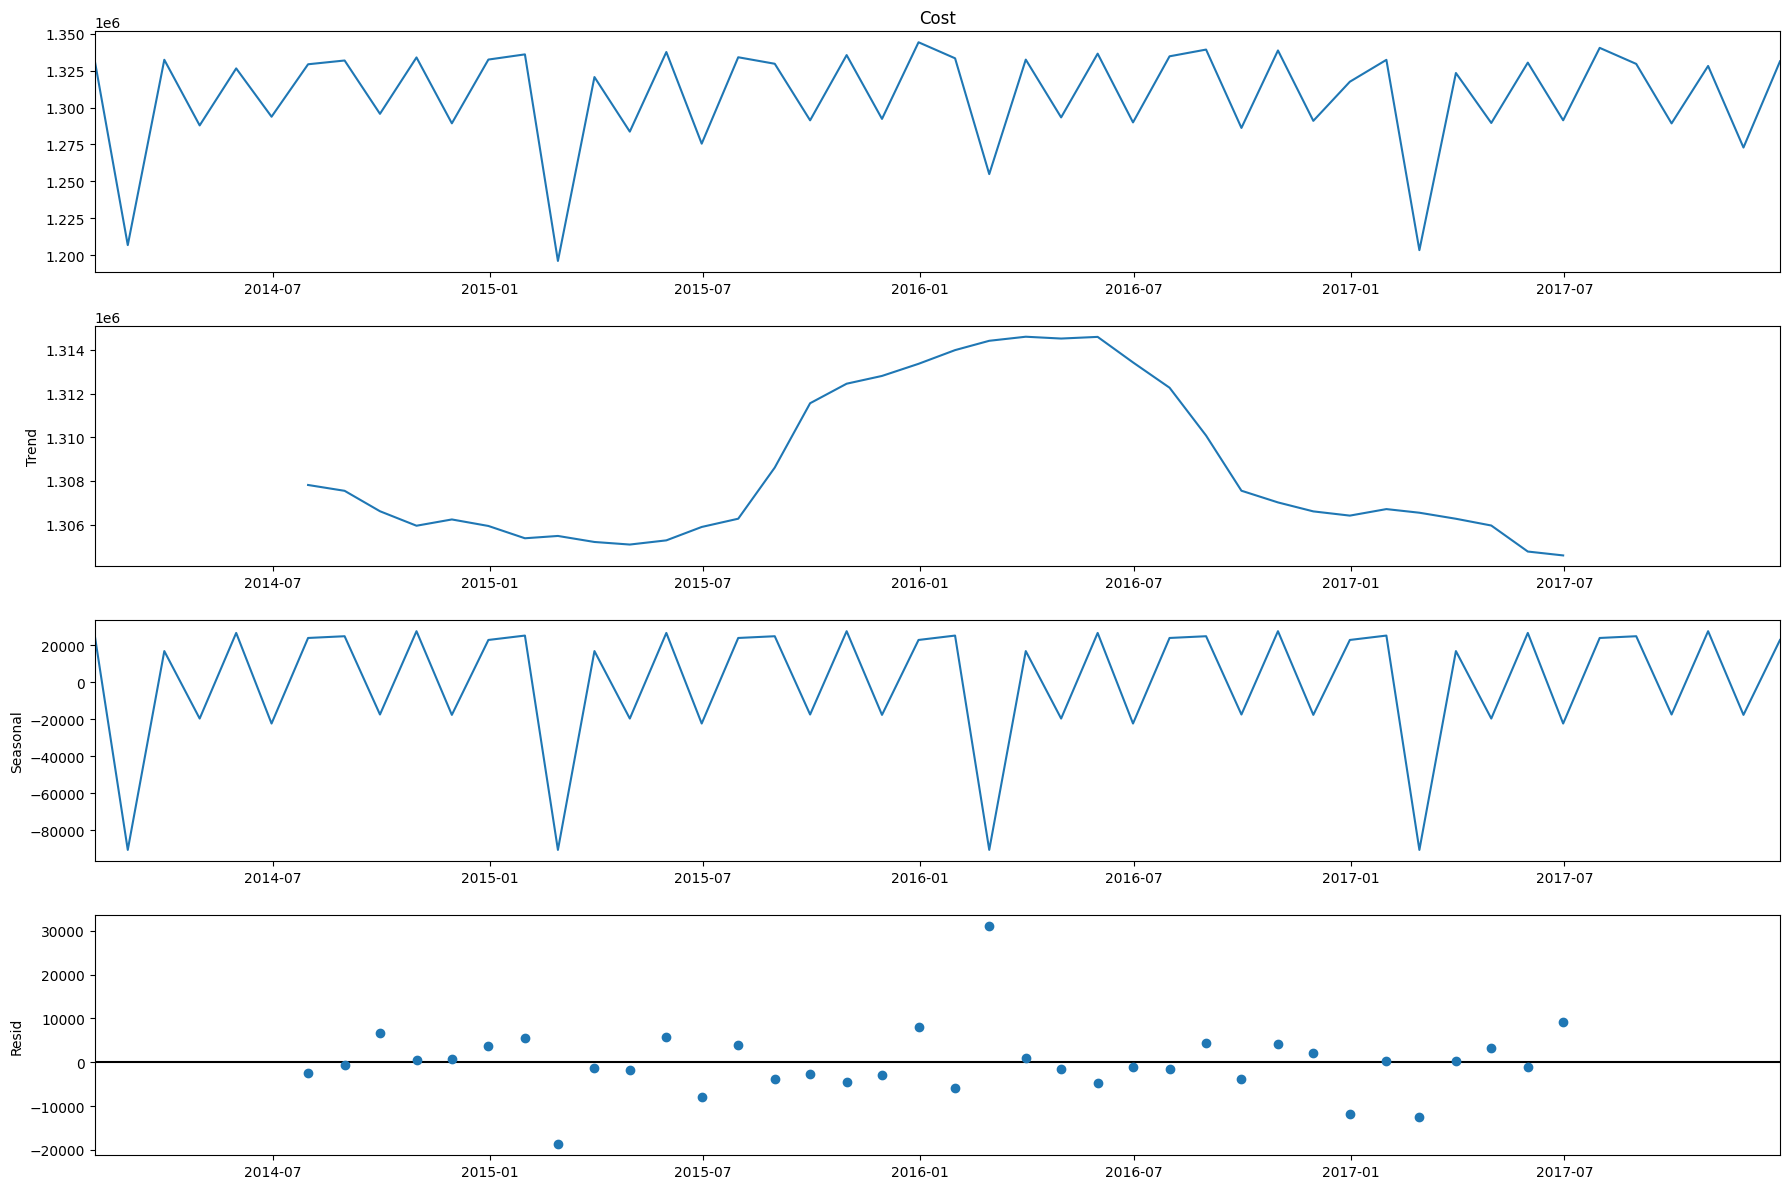

In [57]:
# Multiplicative Decomposition
from statsmodels.tsa.seasonal import seasonal_decompose
rcParams['figure.figsize'] = 18, 12
result_additive = seasonal_decompose(df_monthly,
                                     model='additive')
fig = result_additive.plot()

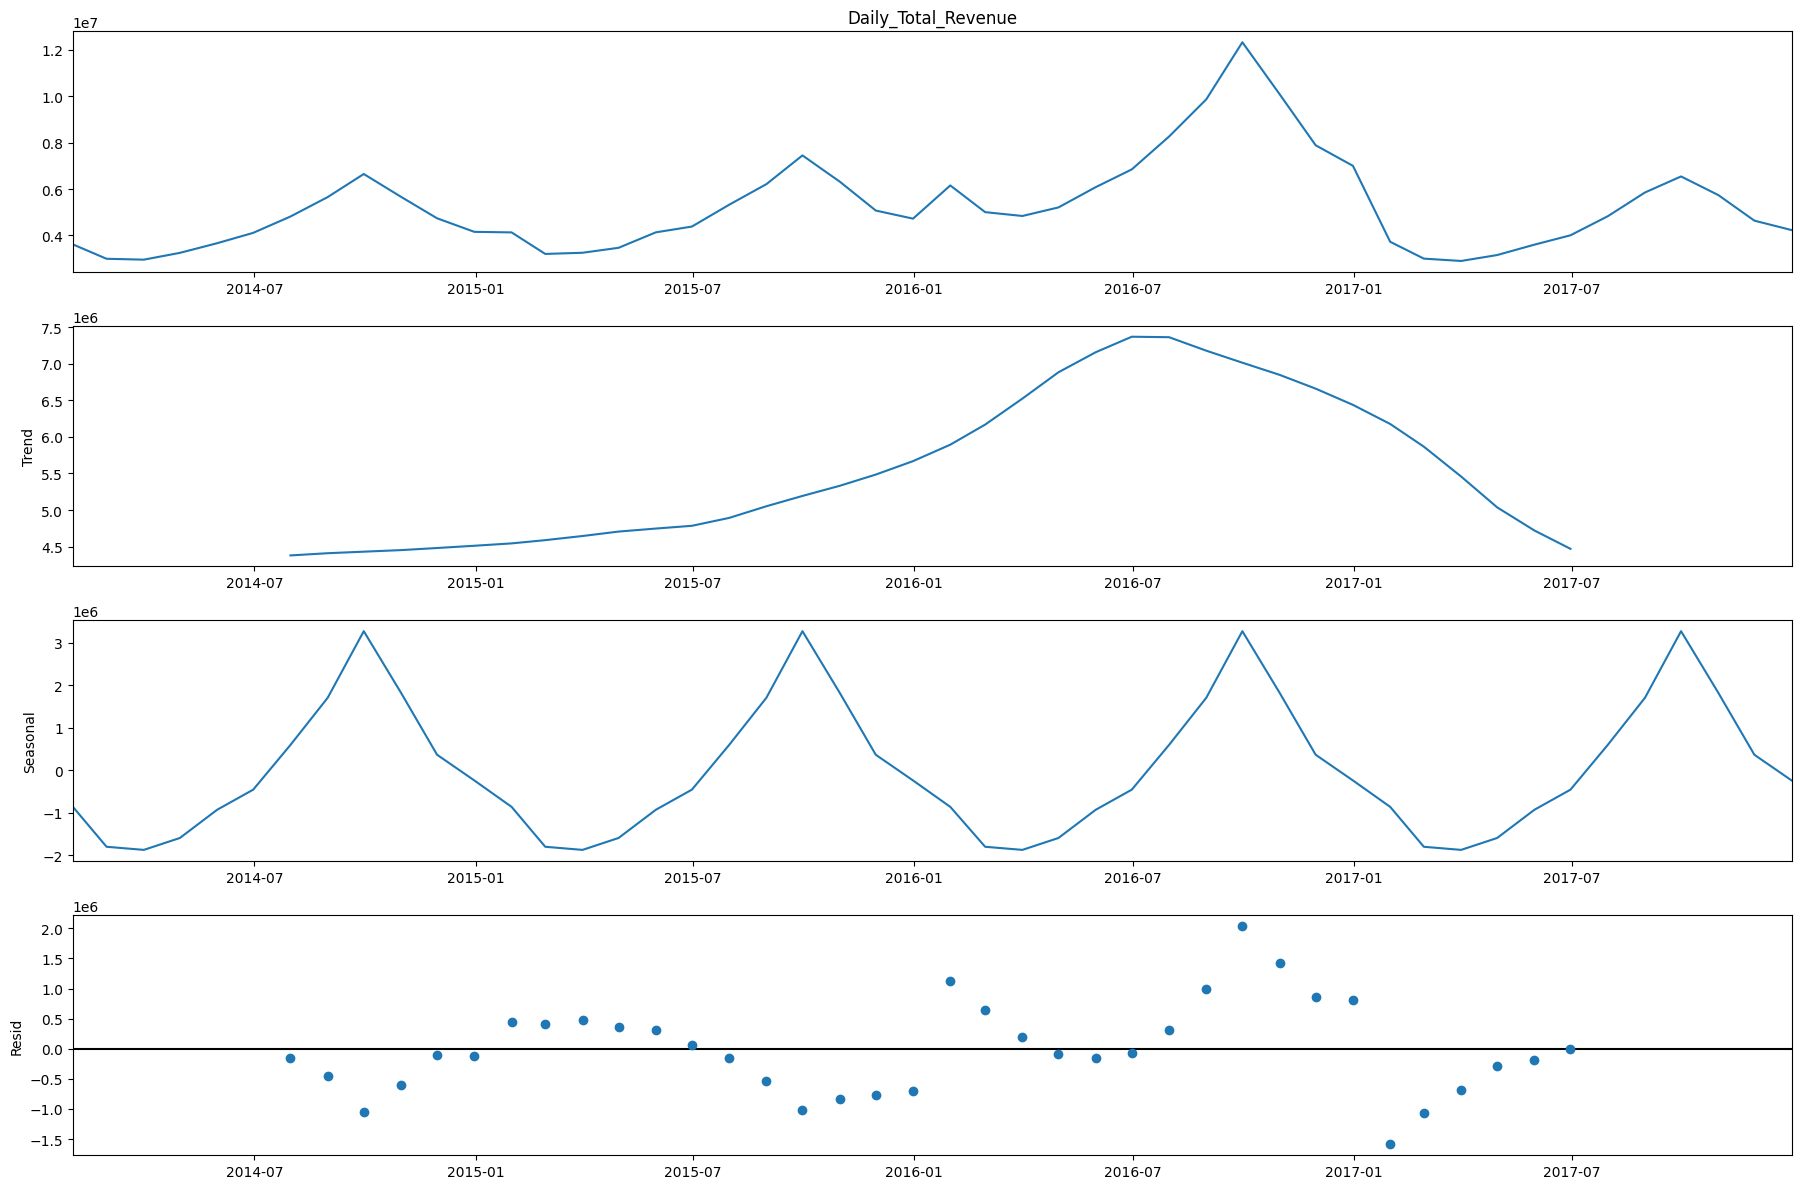

In [58]:
# Multiplicative Decomposition
from statsmodels.tsa.seasonal import seasonal_decompose
rcParams['figure.figsize'] = 18, 12
result_additive_rev = seasonal_decompose(df_monthly_rev,
                                     model='additive')
fig = result_additive_rev.plot()

### Time series forecasting with ARIMA

- ARIMA, short for ‘Auto Regressive Integrated Moving Average’ is actually a class of models that ‘explains’ a given time series based on its own past values, that is, its own lags and the lagged forecast errors, so that equation can be used to forecast future values.

- Any ‘non-seasonal’ time series that exhibits patterns and is not a random white noise can be modeled with ARIMA models.

- An ARIMA model is characterized by 3 terms: p, d, q where,
    - p is the order of the AR term
    - q is the order of the MA term
    - d is the number of differencing required to make the time series stationary

If a time series, has seasonal patterns, then you need to add seasonal terms and it becomes SARIMA, short for ‘Seasonal ARIMA’.
d term

- The first step to build an ARIMA model is to make the time series stationary. Why?

- Because, term ‘Auto Regressive’ in ARIMA means it is a linear regression model that uses its own lags as predictors. Linear regression models, as you know, work best when the predictors are not correlated and are independent of each other.

- The most common approach is to difference it. That is, subtract the previous value from the current value. Sometimes, depending on the complexity of the series, more than one differencing may be needed.

- The value of d, therefore, is the minimum number of differencing needed to make the series stationary.

    And if the time series is already stationary, then d = 0.

- Next, what are the ‘p’ and ‘q’ terms?

  - ‘p’ is the order of the ‘Auto Regressive’ (AR) term. It refers to the number of lags of Y to be used as predictors.

  - And ‘q’ is the order of the ‘Moving Average’ (MA) term. It refers to the number of lagged forecast errors that should go into the ARIMA Model.

** ARIMA model in words:**

Predicted

= Constant + Linear combination Lags of Y (upto p lags) + Linear Combination of Lagged forecast errors (upto q lags)
(1) How to find the order of differencing (d) in ARIMA model

- The purpose of differencing it to make the time series stationary.

- But we need to be careful to not over-difference the series. Because, an over differenced series may still be non-stationary, which in turn will affect the model parameters.

  ** So how to determine the right order of differencing? **

- The right order of differencing is the minimum differencing required to get a near-stationary series which roams around a defined mean and the ACF plot reaches to zero fairly quick.

- If the autocorrelations are positive for many number of lags (10 or more), then the series needs further differencing.

- On the other hand, if the lag 1 autocorrelation itself is too negative, then the series is probably over-differenced.

(1) First, check if the series is stationary using the Augmented Dickey Fuller test (adfuller()), from the statsmodels package.

- Because, you need differencing only if the series is non-stationary.
- Else, no differencing is needed, that is, d=0.

The null hypothesis of the ADF test is that the time series is non-stationary. So, if the p-value of the test is less than the significance level (0.05) then you reject the null hypothesis and infer that the time series is indeed stationary.

We are going to apply one of the most commonly used method for time-series forecasting, known as ARIMA, which stands for Autoregressive Integrated Moving Average.

ARIMA models are denoted with the notation ARIMA(p, d, q).

These three parameters account for seasonality, trend, and noise in data:


In [61]:
# check stationarity
result = adfuller(df.loc['2015']['Cost'].dropna())

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -18.016294
p-value: 0.000000


Since P-value is less than the significance level of 0.05, that means we should reject the null hypothesis.

H0 : TS is non stationary

It means the TS is stationary

let us check with ACF plot

In [62]:
# check stationarity
result_rev = adfuller(df_revenue.loc['2015']['Daily_Total_Revenue'].dropna())

print('ADF Statistic: %f' % result_rev[0])
print('p-value: %f' % result_rev[1])

ADF Statistic: -1.264892
p-value: 0.645077


the p-value is greater than the significance level of 0.05. This indicates that you do not have sufficient evidence to reject the null hypothesis. Therefore, you might conclude that the time series data is likely non-stationary or contains a unit root.

However, it's important to note that a single test result might not provide a definitive conclusion about the stationarity of the data. Other factors, such as domain knowledge, visualization, and further analyses, should be considered to determine the true nature of the data and whether any transformations or preprocessing steps are necessary for your specific analysis or modeling goals.

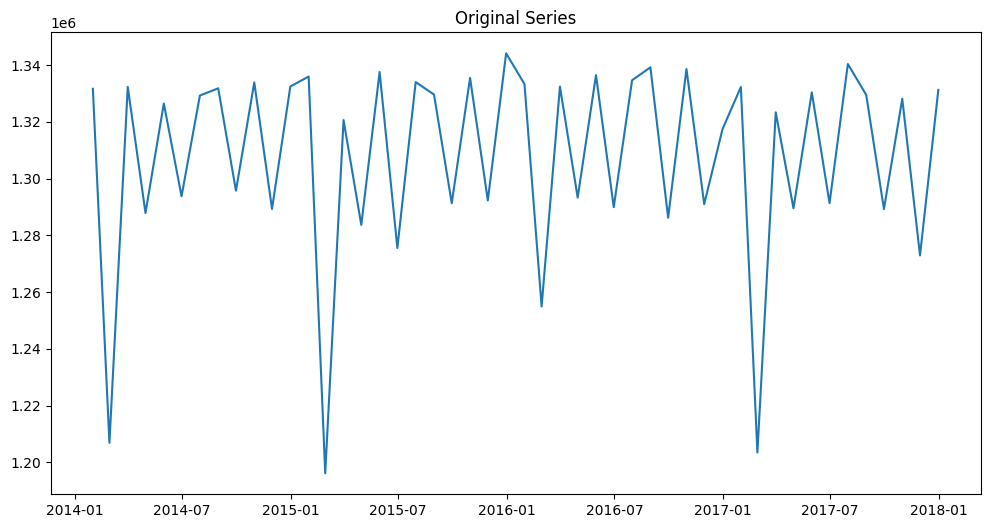

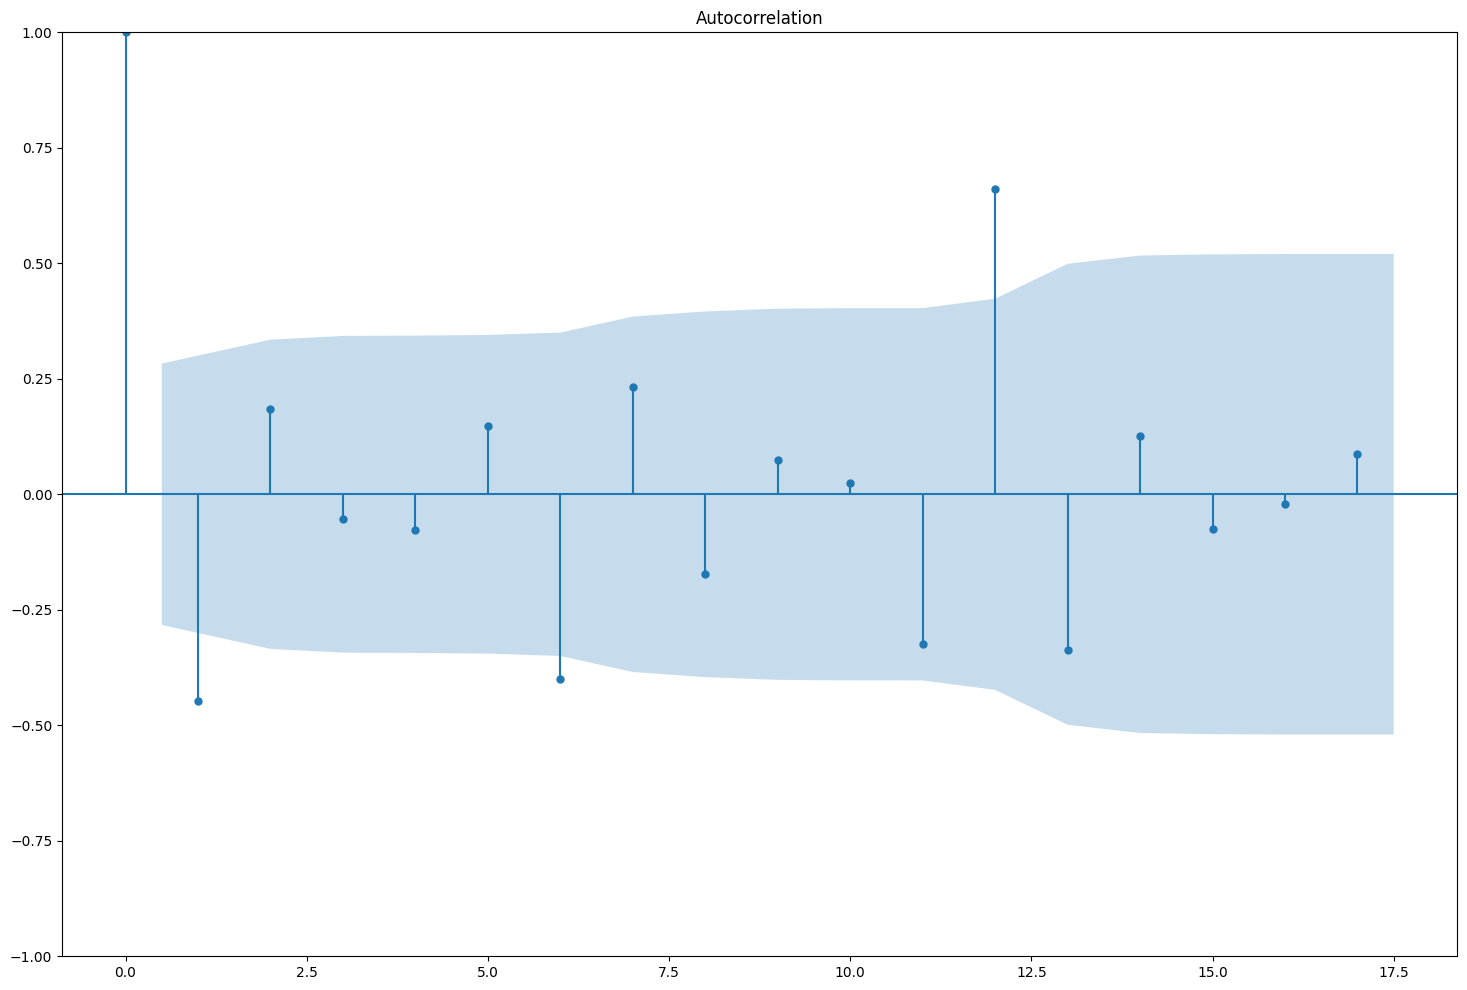

In [63]:
from statsmodels.graphics.tsaplots import plot_acf
# Original Series
# fig, axes = plt.subplots(6, 1, sharex=True)
#fig, axes = plt.subplots(3, 2, figsize=(11, 8))
plt.figure(figsize=(12, 6))

plt.plot(tc)
plt.title('Original Series')
acf0 = plot_acf(tc)

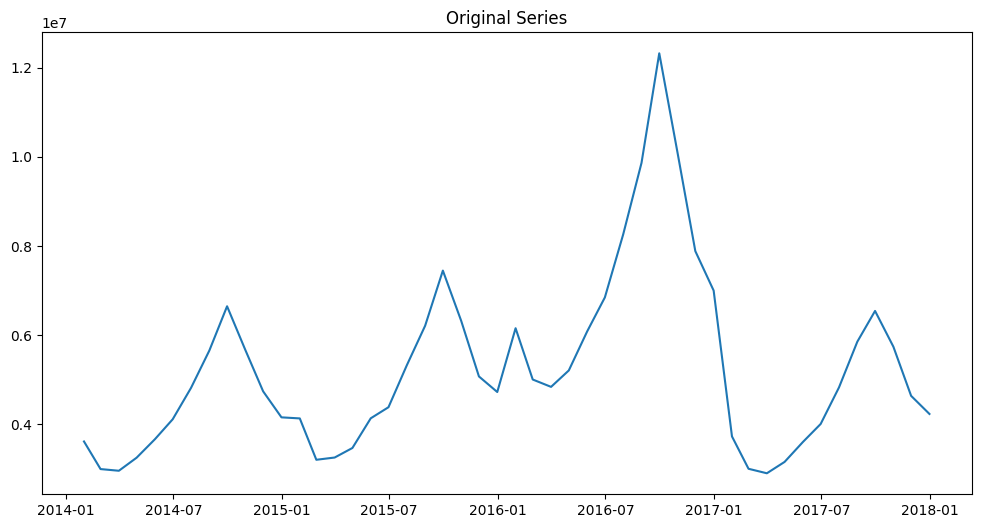

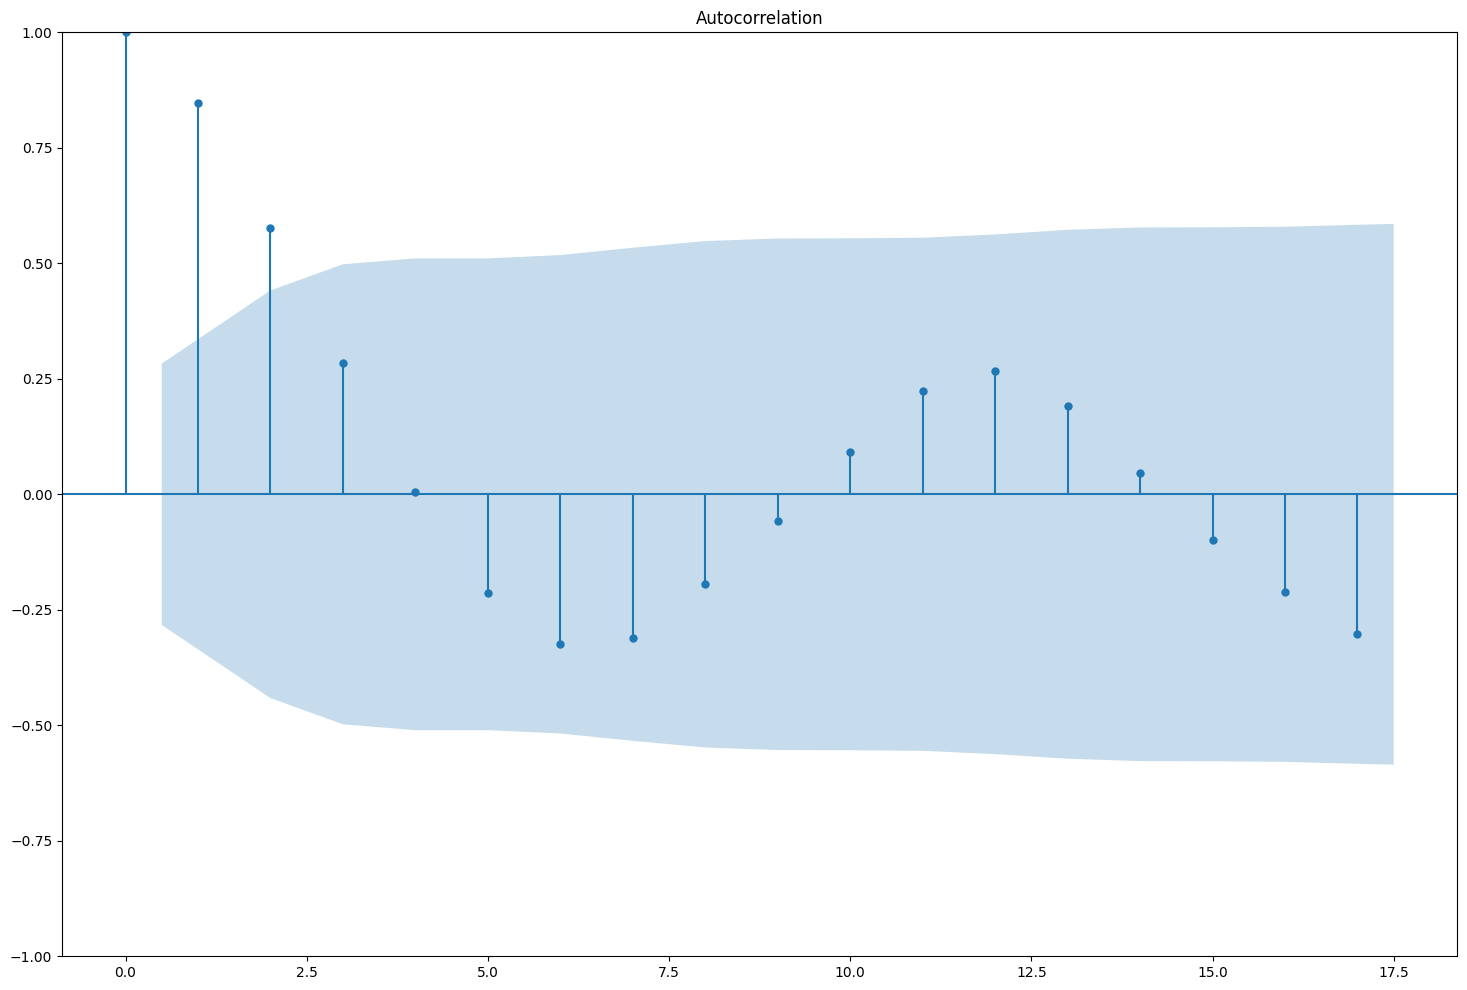

In [64]:
from statsmodels.graphics.tsaplots import plot_acf
# Original Series
# fig, axes = plt.subplots(6, 1, sharex=True)
#fig, axes = plt.subplots(3, 2, figsize=(11, 8))
plt.figure(figsize=(12, 6))

plt.plot(tr)
plt.title('Original Series')
acf0 = plot_acf(tr)

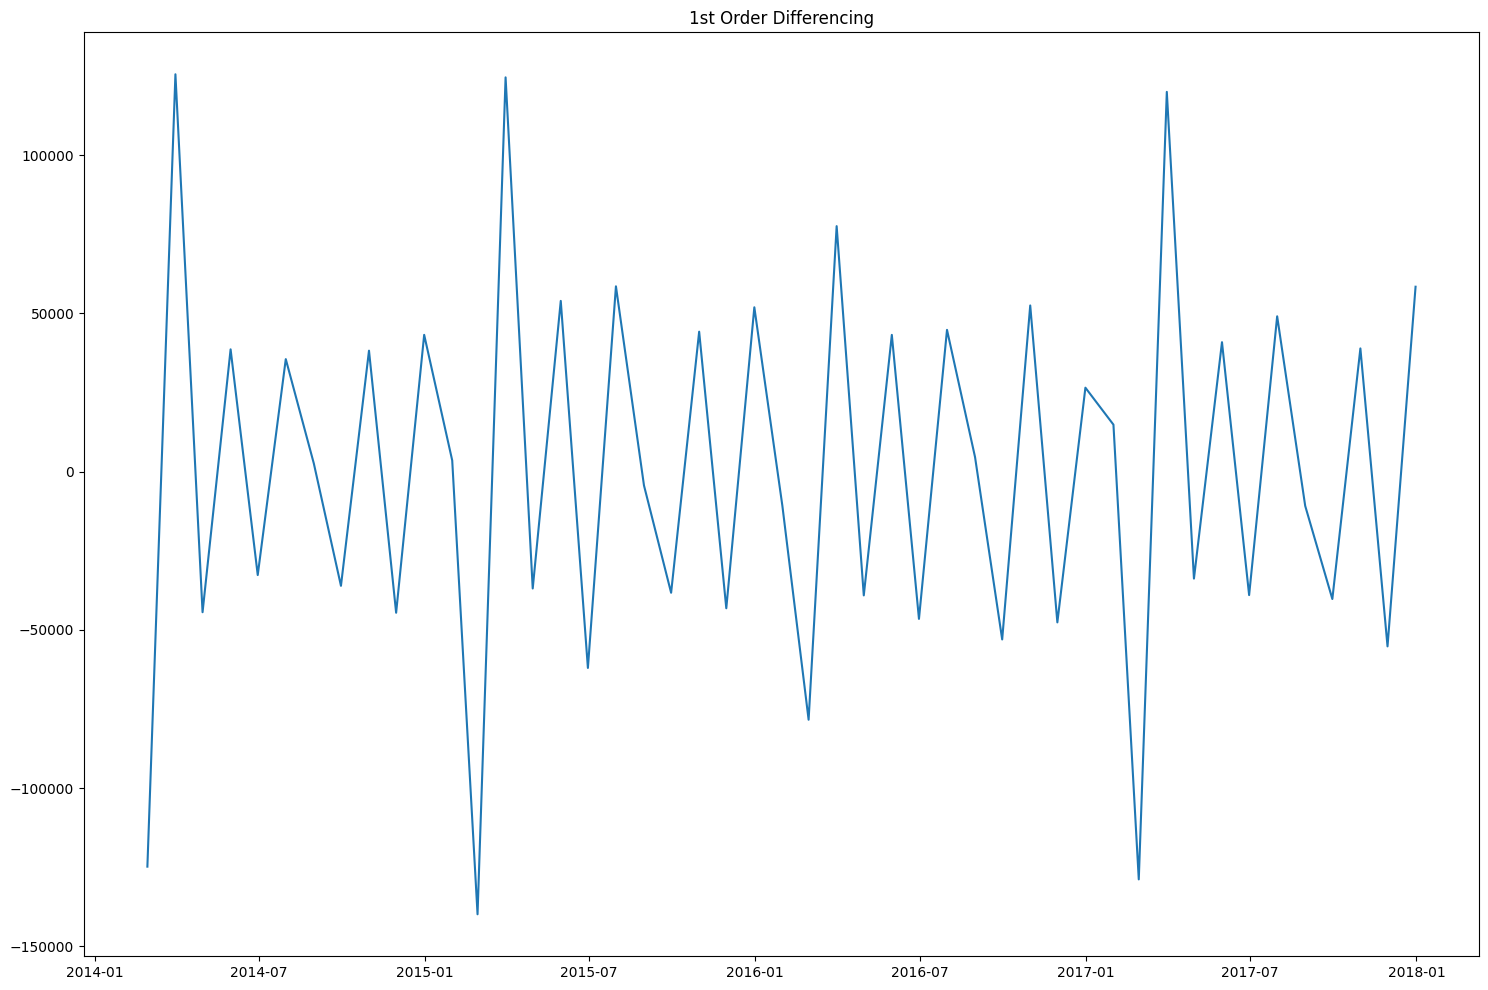

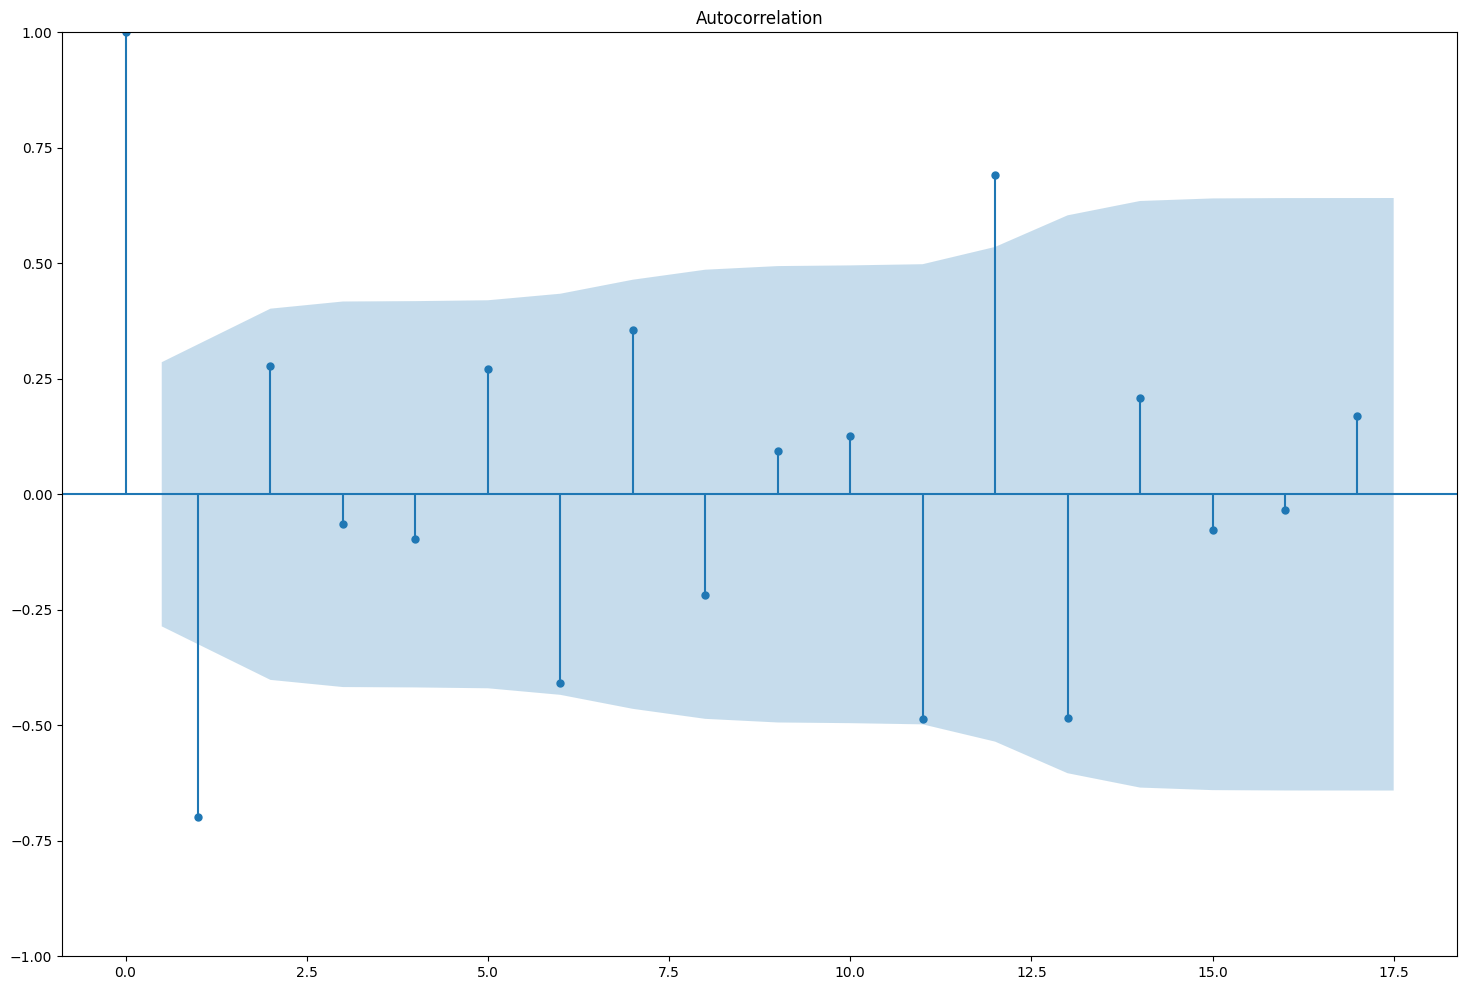

In [91]:
# 1st order Differencing
plt.plot(tc.diff());
plt.title('1st Order Differencing')
acf1 = plot_acf(tc.diff().dropna())

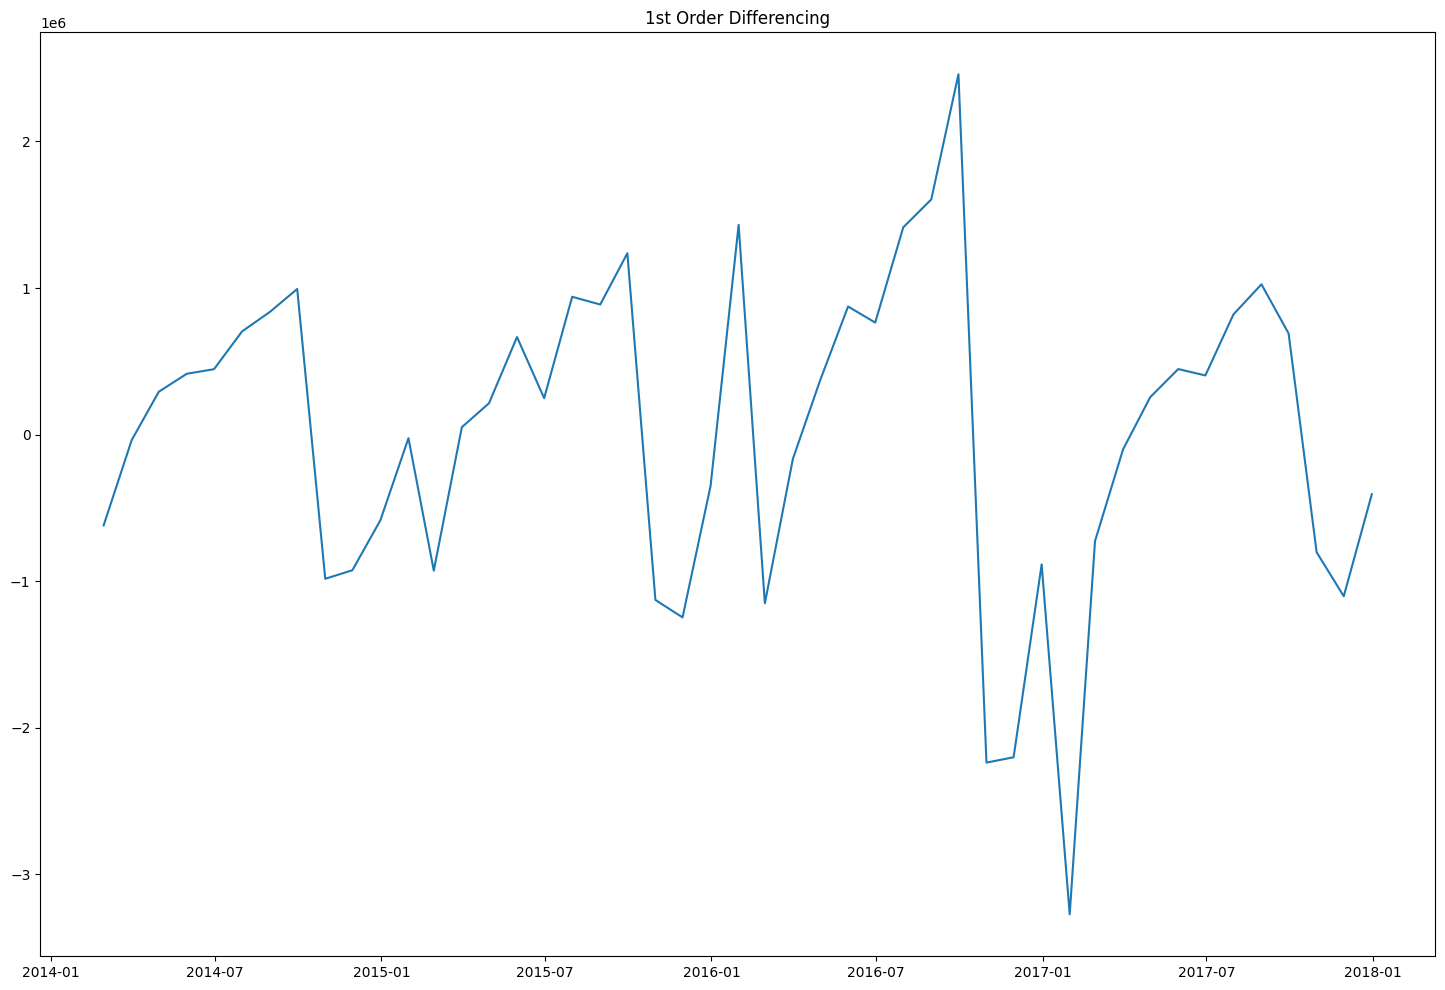

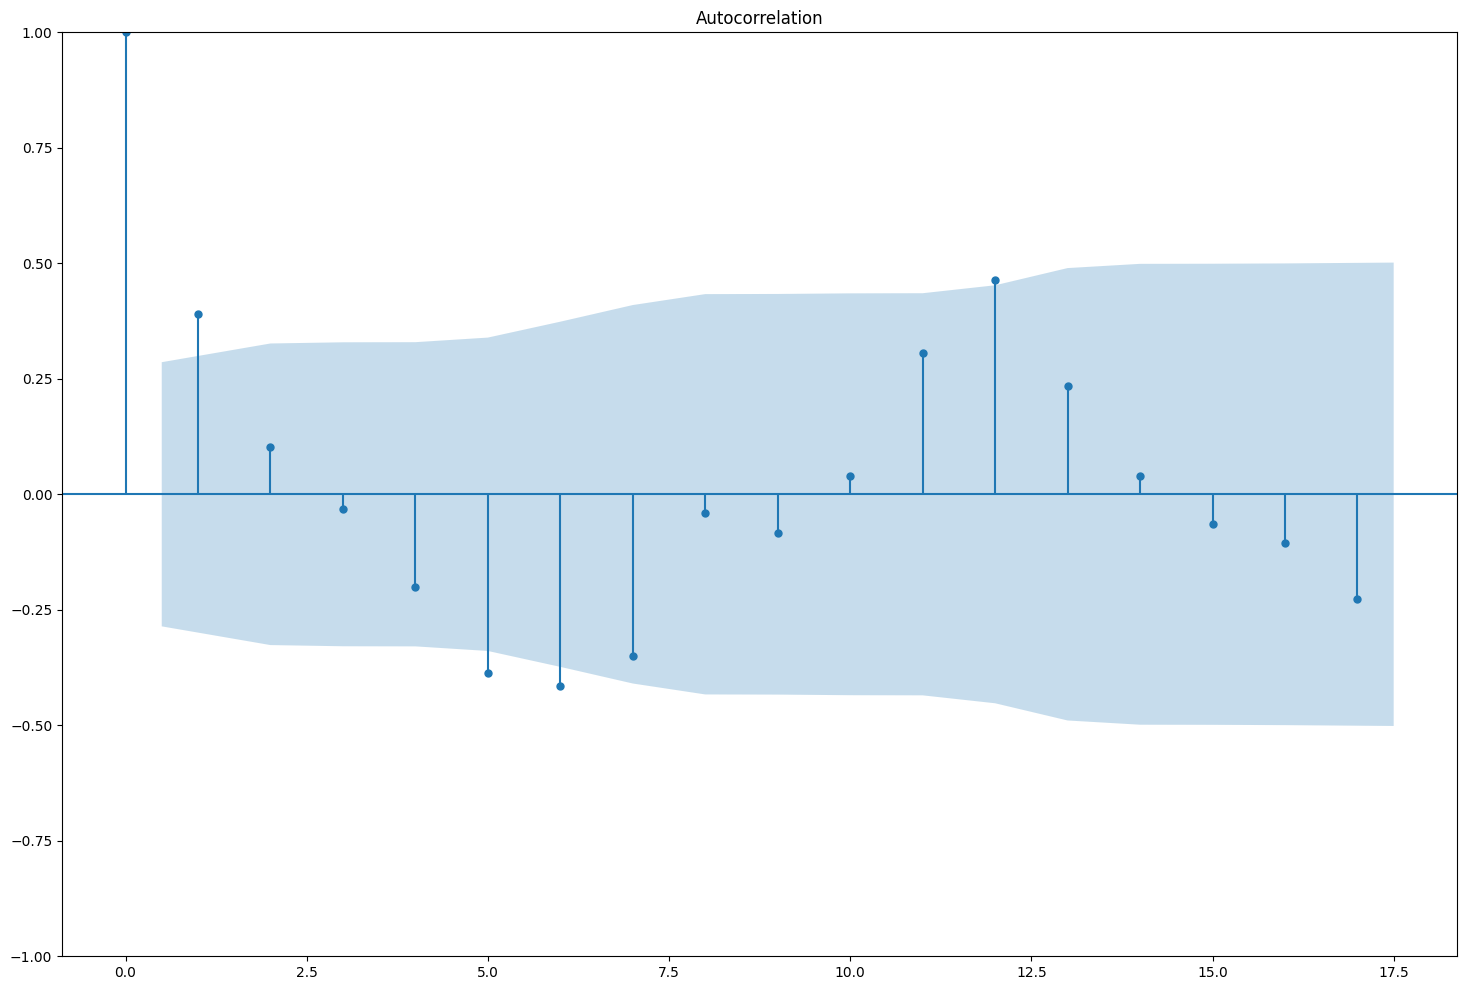

In [65]:
# 1st order Differencing
plt.plot(tr.diff());
plt.title('1st Order Differencing')
acf1 = plot_acf(tr.diff().dropna())

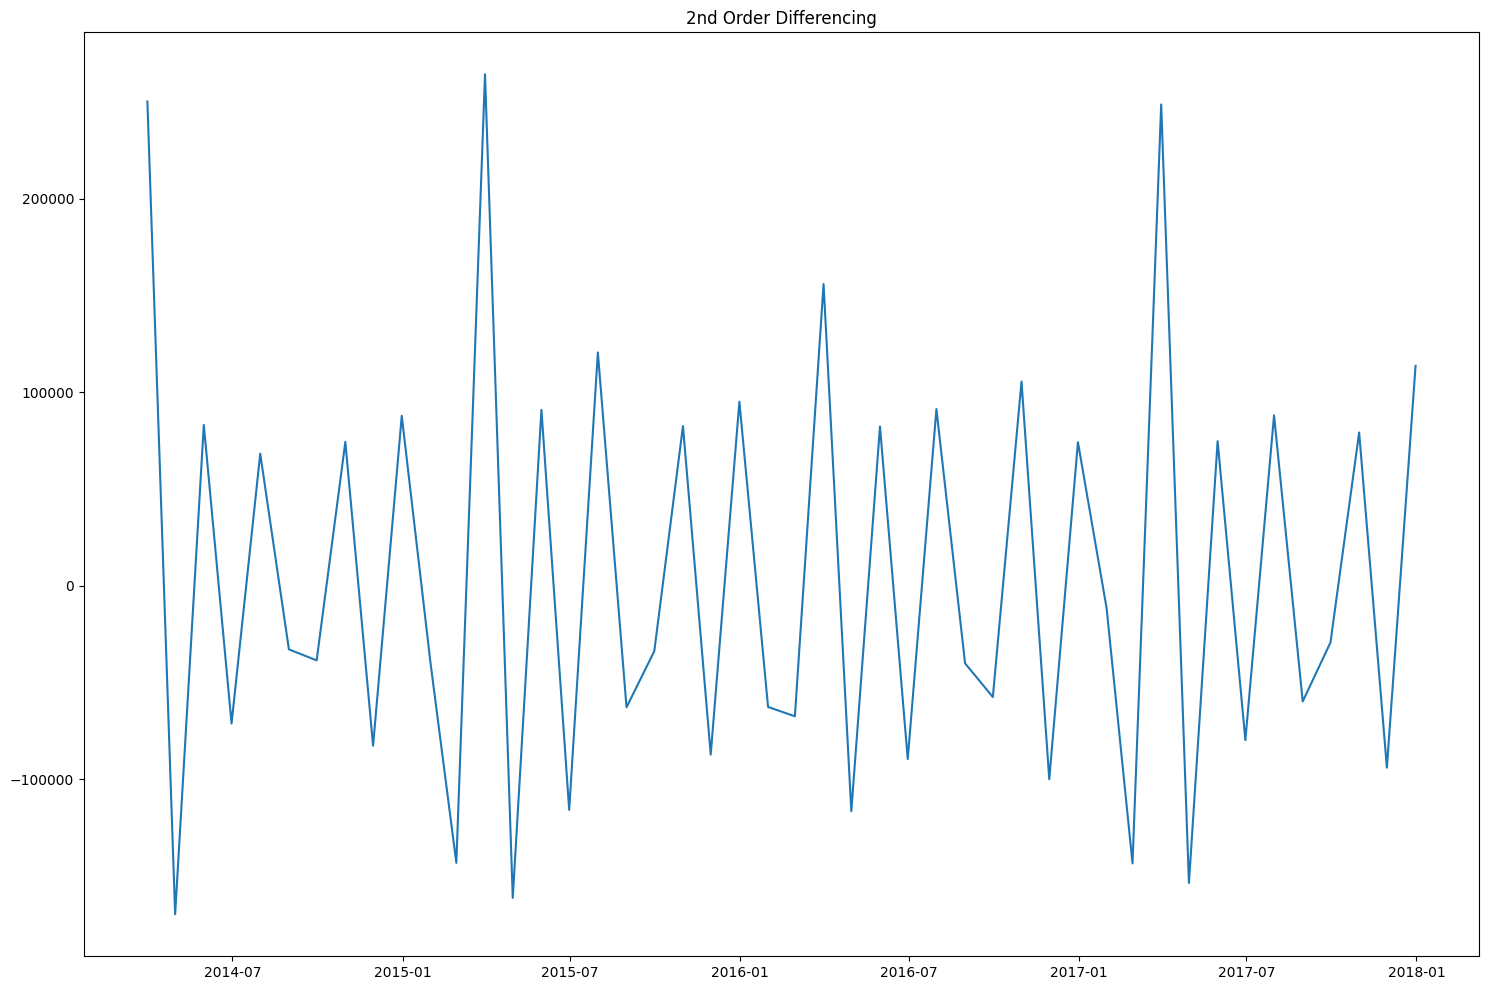

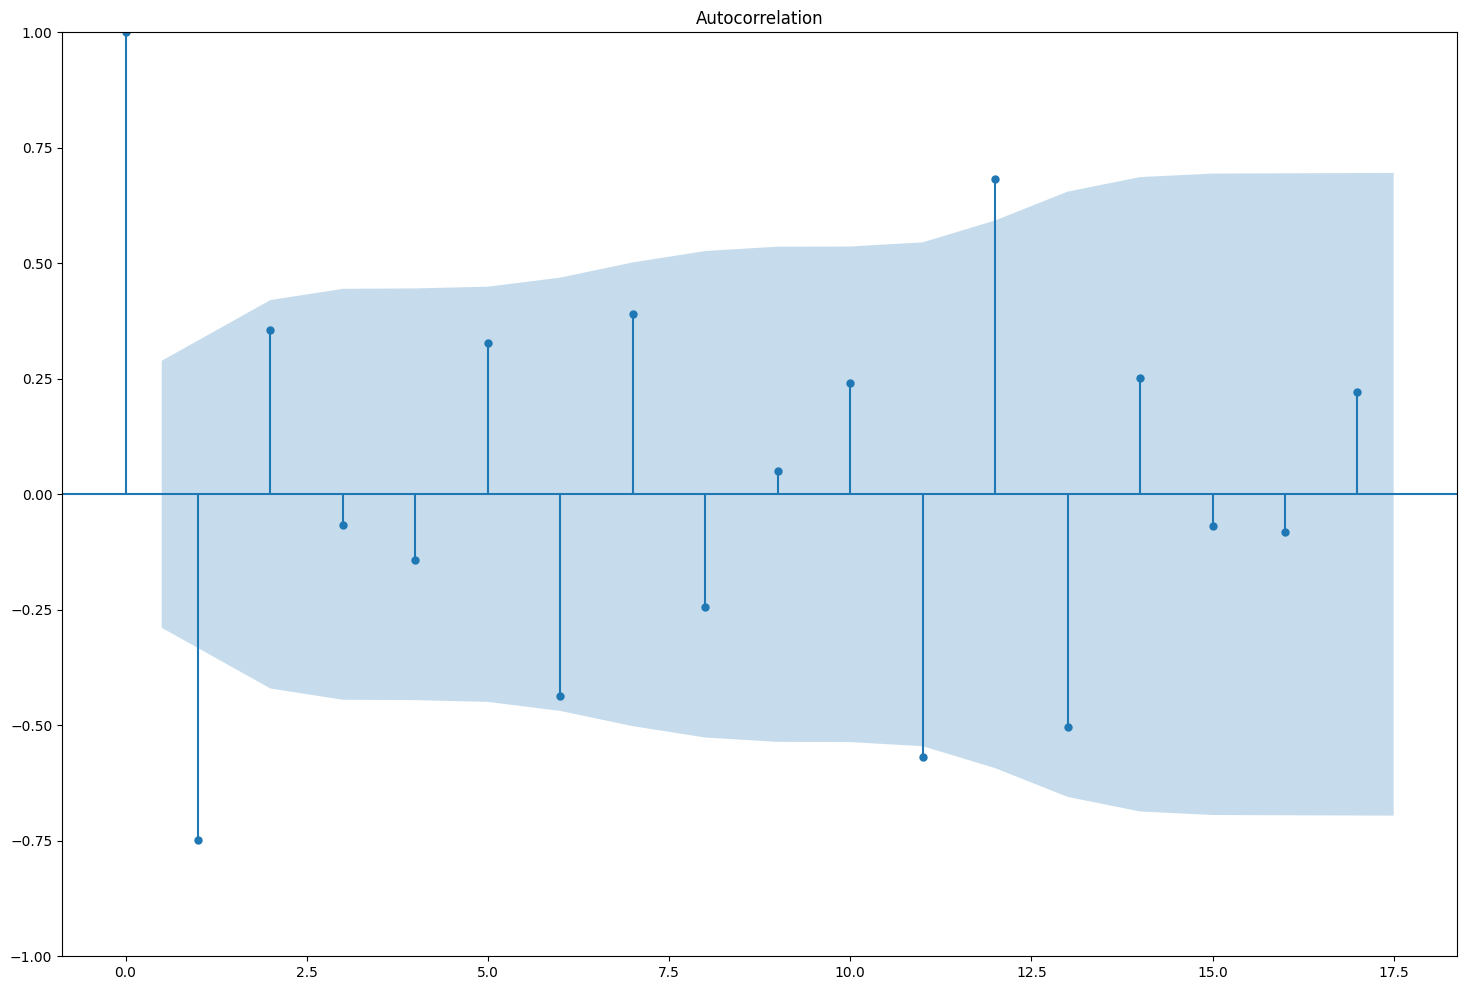

In [66]:
# 2nd order Differencing
plt.plot(tc.diff().diff());
plt.title('2nd Order Differencing')
acf2 = plot_acf(tc.diff().diff().dropna())

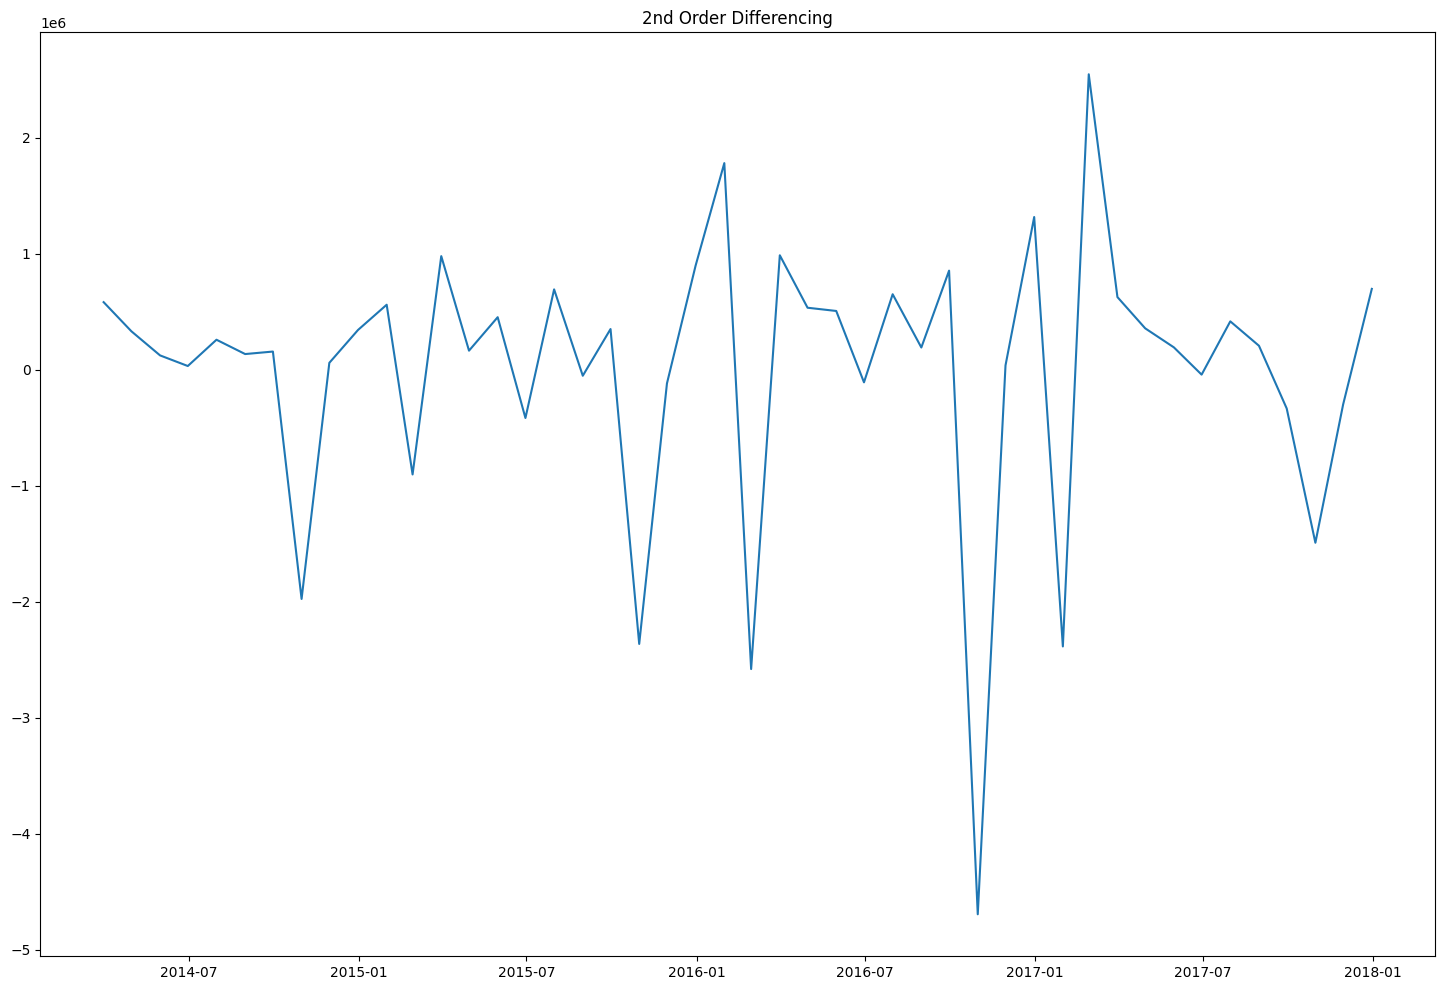

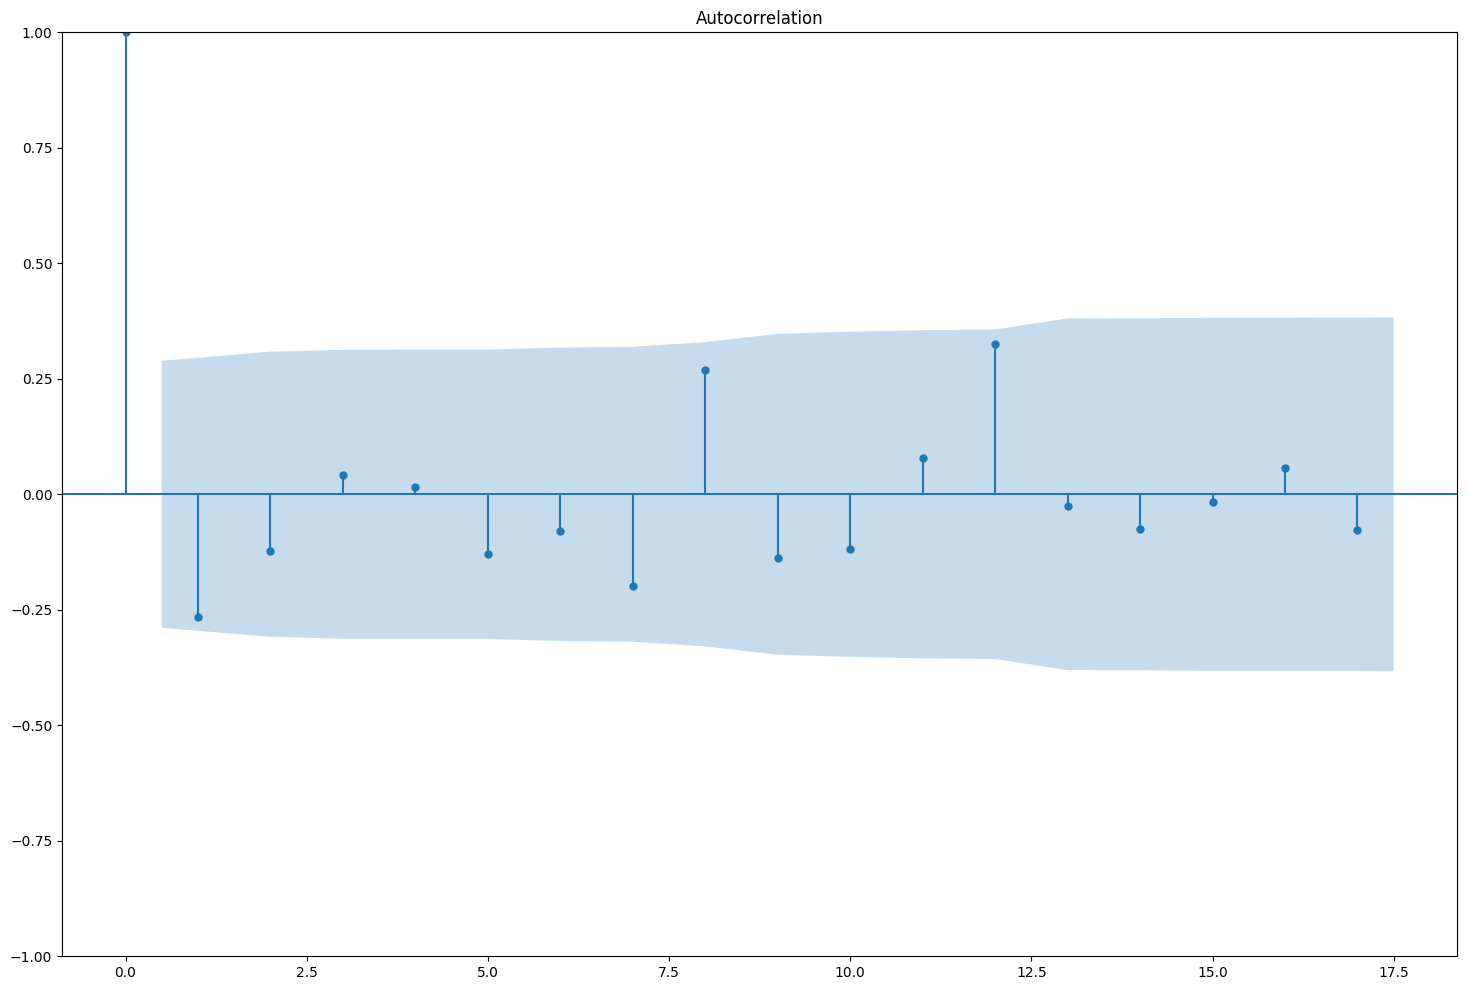

In [67]:
# 2nd order Differencing
plt.plot(tr.diff().diff());
plt.title('2nd Order Differencing')
acf2 = plot_acf(tr.diff().diff().dropna())

### Observation

- For the above series, the time series reaches stationarity without ANY differencing. There is no any statistically significant spikes seen in autocorrelation plot above. !!!

- Look at the 1st order differencing, with a lag of 1, the ACF goes into negative zone, indicates the over differenced.

- Therefore, I will consider d = 0 (or we can try with 1)

(2) How to find the order of the AR term (p)

- After differencing the TS, we need to ensure there is no autocorrelation in the differenced time series

- determine the AR and MA terms

- You can find out the required number of AR terms by inspecting the Partial Autocorrelation (PACF) plot.

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


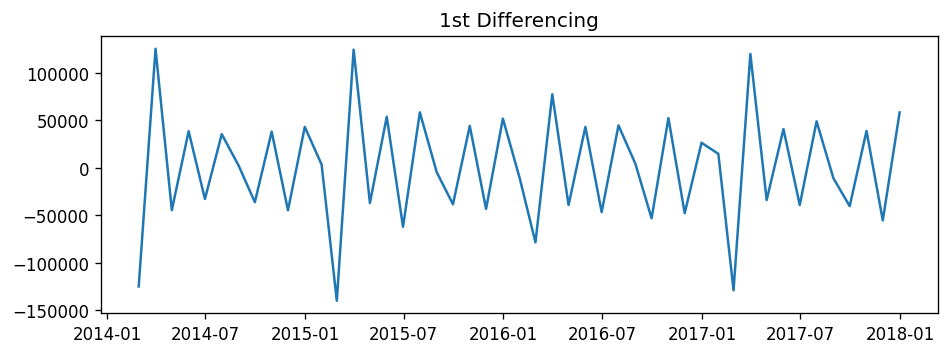

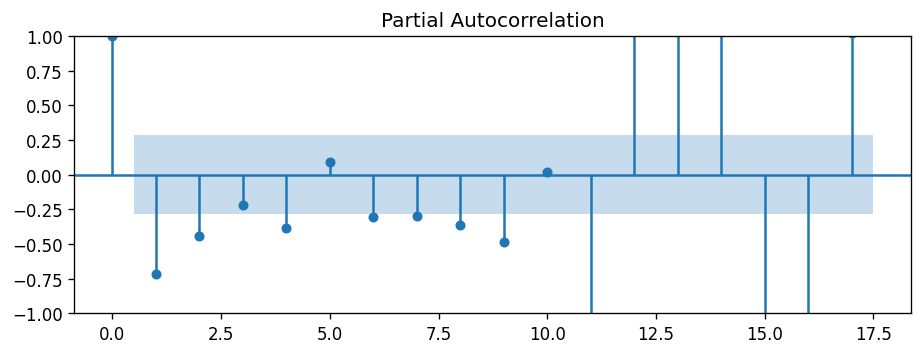

In [68]:
from statsmodels.graphics.tsaplots import plot_pacf
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})
#fig, axes = plt.subplots(1, 2, sharex=True)

plt.plot(tc.diff());
plt.title('1st Differencing')
#plt.set(ylim=(0,5))

pacf = plot_pacf(tc.diff().dropna())

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


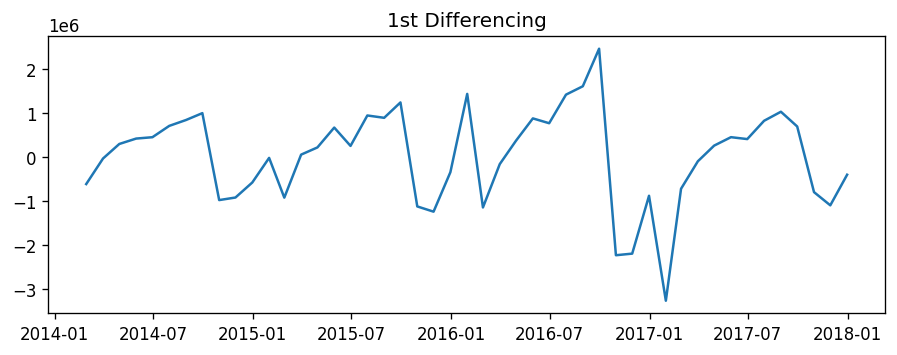

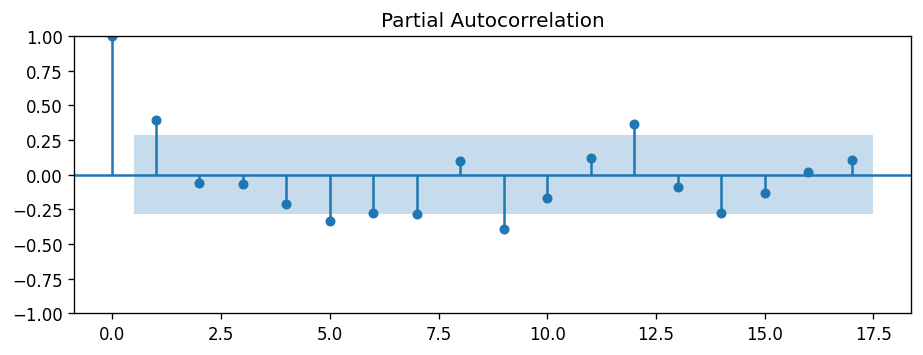

In [69]:
from statsmodels.graphics.tsaplots import plot_pacf
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})
#fig, axes = plt.subplots(1, 2, sharex=True)

plt.plot(tr.diff());
plt.title('1st Differencing')
#plt.set(ylim=(0,5))

pacf = plot_pacf(tr.diff().dropna())

In above partial autocorrelation plot, we don't observe any significant spikes in lower order lags(however,a slight portion of first lag is into the negative zone).

Therefore, we can be conservative and tentatively fix the p as 0 (we can try with 1 later).

(3) How to find the order of the MA term (q):

look at the ACF plot for the number of MA terms. An MA term is technically, the error of the lagged forecast.

The ACF tells how many MA terms are required to remove any autocorrelation in the stationarized series.

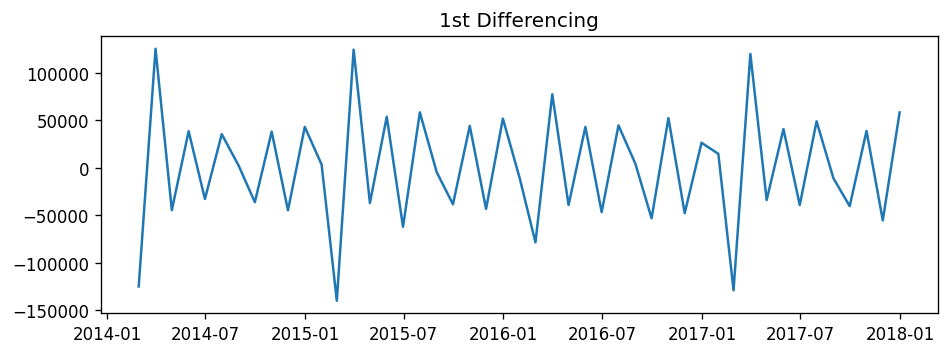

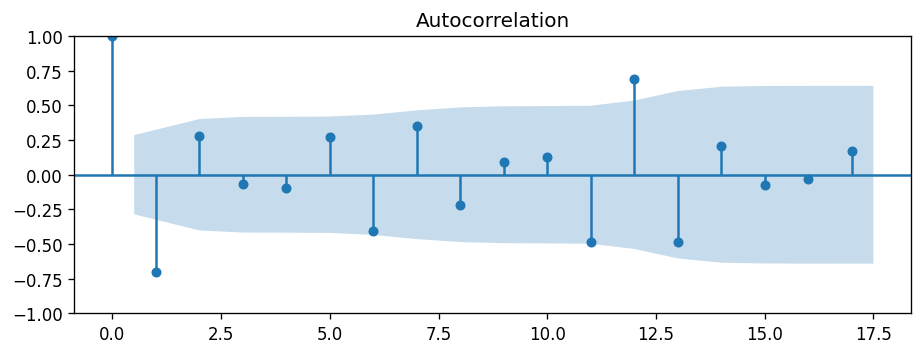

In [70]:
plt.plot(tc.diff());
plt.title('1st Differencing')

#axes[1].set(ylim=(0,1.2))

acf = plot_acf(tc.diff().dropna())

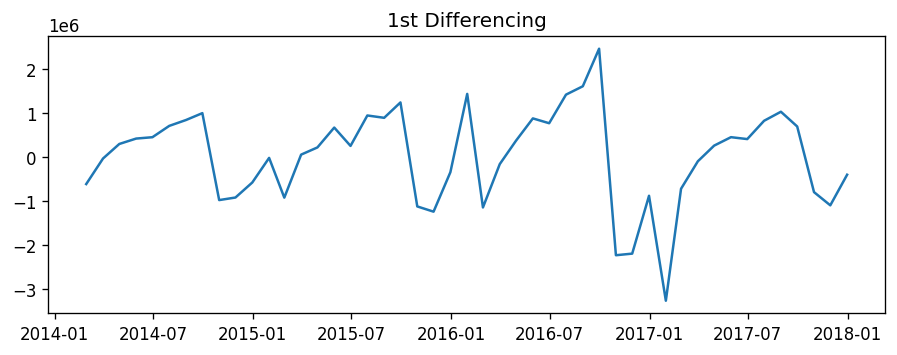

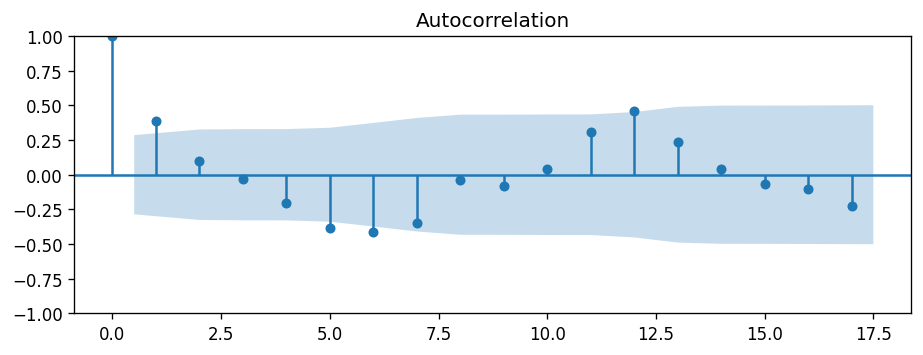

In [71]:
plt.plot(tr.diff());
plt.title('1st Differencing')

#axes[1].set(ylim=(0,1.2))

acf = plot_acf(tr.diff().dropna())


Even with lag 1 the autocorrelation is going negative

Let’s tentatively fix q as 0.
### build the ARIMA Model:

Now that we've determined the values of p, d and q, we have everything needed to fit the ARIMA model.

Let’s use the ARIMA() implementation in statsmodels package.

we will consider d = 0 (later we can try with 1)
we will consider p = 0
we will consider q = 0

ARIMA with default settings of {0 , 0 , 0}

In [72]:
#Import all required packages:
import warnings
warnings.filterwarnings("ignore")
import os
import itertools
import pandas as pd
import numpy as np
from datetime import datetime
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('fivethirtyeight')

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 5

In [75]:
mod_default = sm.tsa.statespace.SARIMAX(tc,
                                order=(0, 0, 0),
                                seasonal_order=(1, 0 , 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results_default = mod_default.fit()
print(results_default.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12       0.9995      0.002    420.579      0.000       0.995       1.004
ma.S.L12      -0.0010      0.007     -0.142      0.887      -0.015       0.013
sigma2      2.666e+08   1.98e-13   1.35e+21      0.000    2.67e+08    2.67e+08


In [73]:
mod_default_rev = sm.tsa.statespace.SARIMAX(tr,
                                order=(0, 0, 0),
                                seasonal_order=(1, 0 , 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results_default_rev = mod_default_rev.fit()
print(results_default_rev.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12       1.1430      0.015     74.737      0.000       1.113       1.173
ma.S.L12    3.794e+12         -0       -inf      0.000    3.79e+12    3.79e+12
sigma2      3.844e+10         -0       -inf      0.000    3.84e+10    3.84e+10


- The summary attribute that results from the output of SARIMAX returns a significant amount of information, but we'll focus our attention on the table of coefficients.

- The coef column shows the weight (i.e. importance) of each feature and how each one impacts the time series. The P>|z| column informs us of the significance of each feature weight. Here, each weight has a p-value lower or close to 0.05, so it is reasonable to retain all of them in our model.

- When fitting seasonal ARIMA models (and any other models for that matter), it is important to run model diagnostics to ensure that none of the assumptions made by the model have been violated. The plot_diagnostics object allows us to quickly generate model diagnostics and investigate for any unusual behavior.

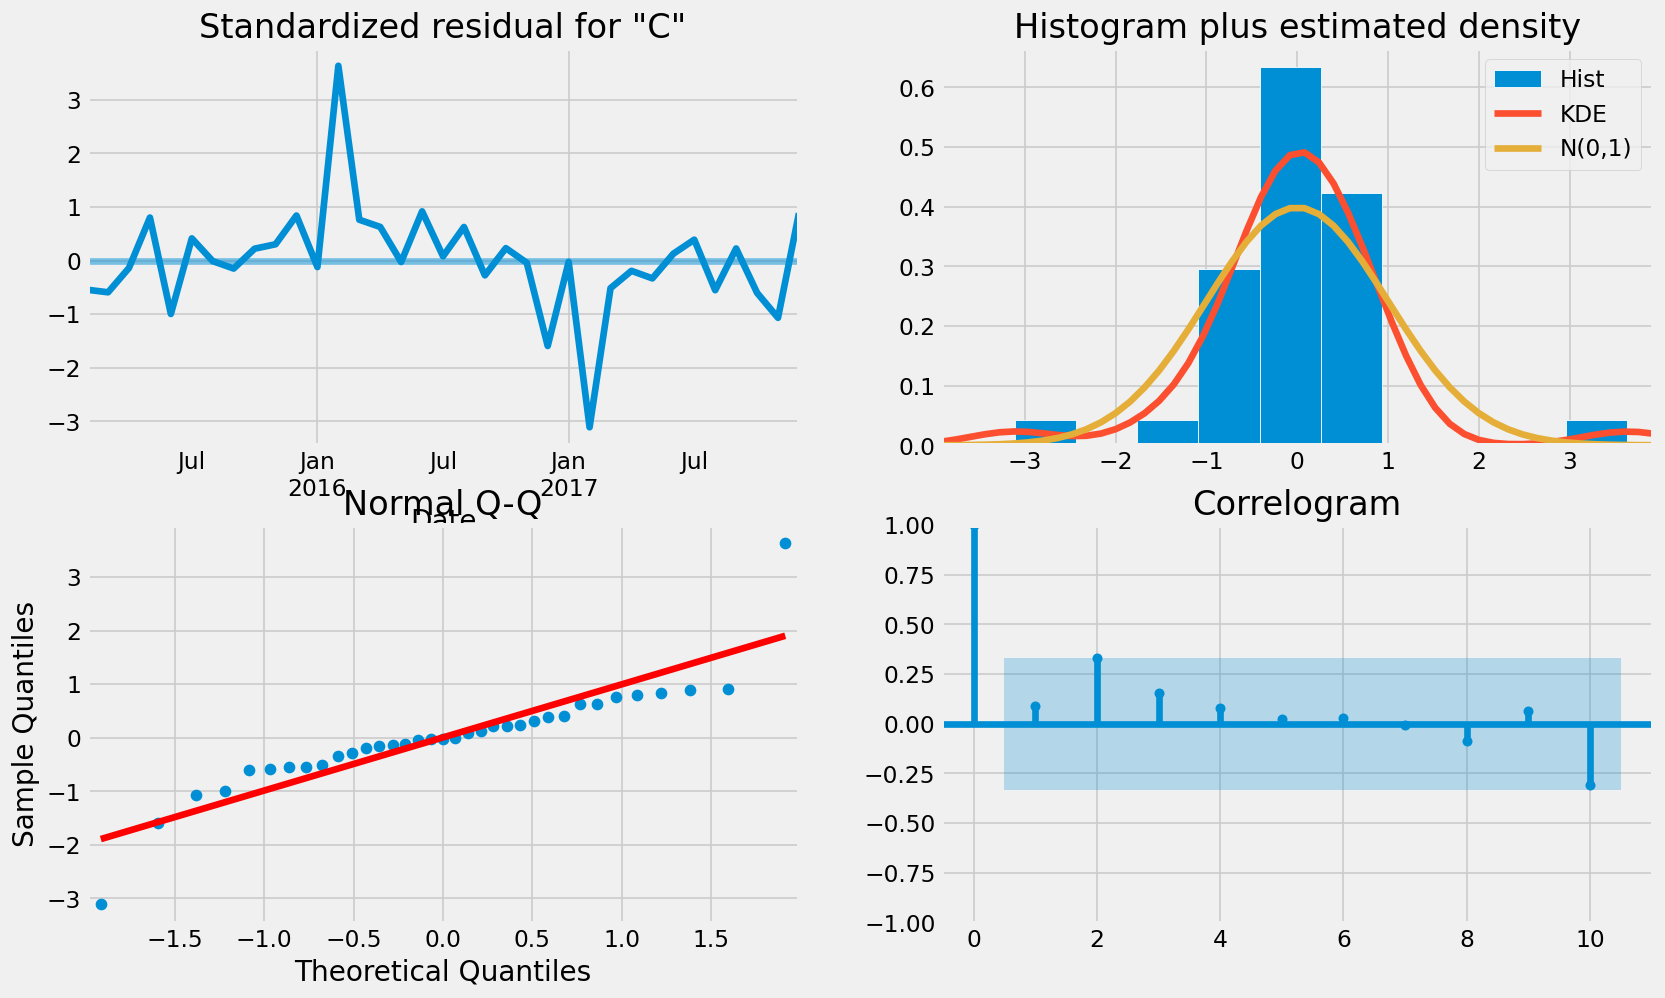

In [76]:
residuals_default = results_default.plot_diagnostics(figsize=(15, 9))

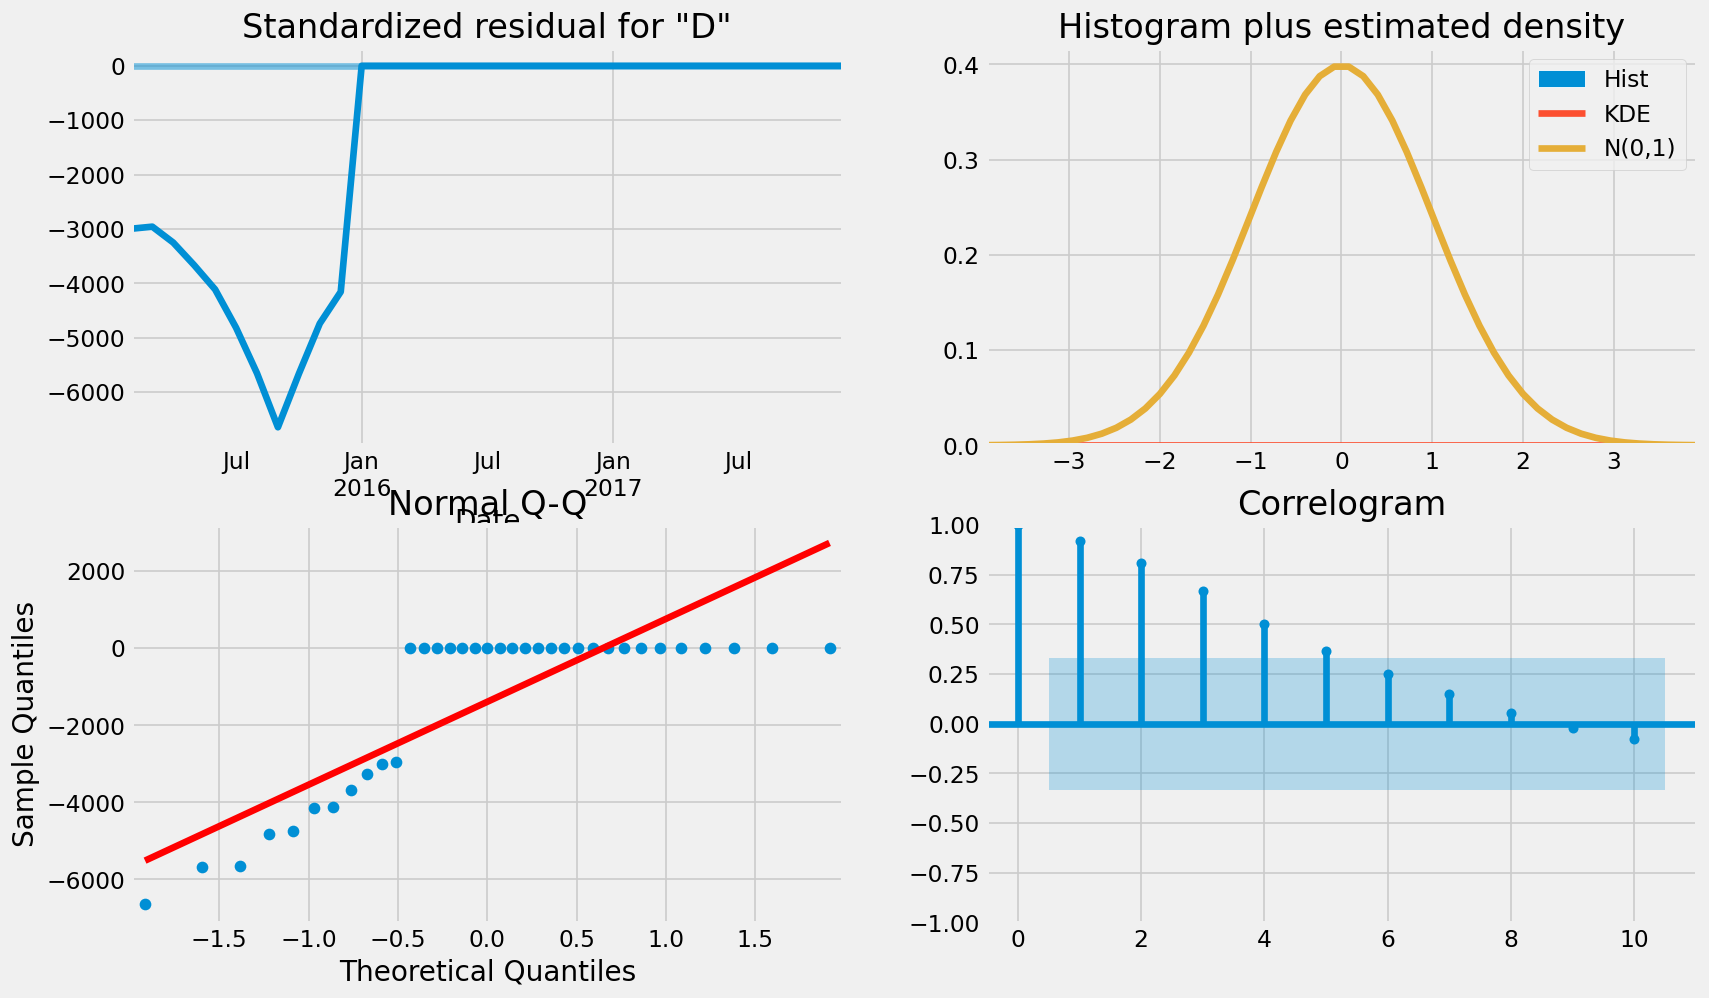

In [77]:
residuals_default = results_default_rev.plot_diagnostics(figsize=(15, 9))


- Our primary concern is to ensure that the residuals of our model are
    - uncorrelated and
    - normally distributed with zero-mean.

- If the seasonal ARIMA model does not satisfy these properties, it is a good indication that it can be further improved.

- In this case, our model diagnostics suggests that the model residuals are normally distributed. Plus more observations as follows:

    - In the top right plot, we see that the red KDE line really does not follow closely with the N(0,1) line (where N(0,1)) is the standard notation for a normal distribution with mean 0 and standard deviation of 1). Hence the residual plots are not perfectly normally distributed.

    - The qq-plot on the bottom left shows that the moderately ordered distribution of residuals (blue dots) follows the linear trend of the samples taken from a standard normal distribution with N(0, 1). Again, this is not really a strong indication that the residuals are normally distributed.

- Those observations lead us to conclude that our model produces a satisfactory fit that could help us understand our time series data and forecast future values.

-  Although we have a satisfactory fit, some parameters of our seasonal ARIMA model could be changed to improve our model fit. For example, our grid search only considered a restricted set of parameter combinations, so we may find better models if we widened the grid search.

### Validating Forecasts:

We have obtained a model for our time series that can now be used to produce forecasts.

We start by comparing predicted values to real values of the time series, which will help us understand the accuracy of our forecasts

The get_prediction() and conf_int() attributes allow us to obtain the values and associated confidence intervals for forecasts of the time series.


## let us try the best parameter search for the ARIMA model ...

### (1) Parameter Selection for the ARIMA Time Series Model

- When looking to fit time series data with a seasonal ARIMA model, our first goal is to find the values of ARIMA(p,d,q)(P,D,Q)s that optimize a metric of interest.

- There are many guidelines and best practices to achieve this goal, yet the correct parametrization of ARIMA models can be a painstaking manual process that requires domain expertise and time.

- I will use a "grid search" to iteratively explore different combinations of parameters.

- For each combination of parameters, I fit a new seasonal ARIMA model with the SARIMAX() function from the statsmodels module and assess its overall quality.

- Once I have explored the entire landscape of parameters, our optimal set of parameters will be the one that yields the best performance for our criteria of interest.

In [85]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

In [86]:
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 1, 0),
 (0, 1, 1),
 (1, 0, 0),
 (1, 0, 1),
 (1, 1, 0),
 (1, 1, 1)]

In [87]:
# Generate all different combinations of seasonal p, d and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
seasonal_pdq

[(0, 0, 0, 12),
 (0, 0, 1, 12),
 (0, 1, 0, 12),
 (0, 1, 1, 12),
 (1, 0, 0, 12),
 (1, 0, 1, 12),
 (1, 1, 0, 12),
 (1, 1, 1, 12)]

In [88]:
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


I can now use the triplets of parameters defined above to automate the process of training and evaluating ARIMA models on different combinations.

In Statistics and Machine Learning, this process is known as __grid search (or hyperparameter optimization)__ for model selection.

When evaluating and comparing statistical models fitted with different parameters, each can be ranked against one another based on how well it fits the data or its ability to accurately predict future data points.

I will use the AIC (Akaike Information Criterion) value, which is conveniently returned with ARIMA models fitted using statsmodels. The AIC measures how well a model fits the data while taking into account the overall complexity of the model.

A model that fits the data very well while using lots of features will be assigned a larger AIC score than a model that uses fewer features to achieve the same goodness-of-fit.

Therefore, I am interested in finding the model that yields the lowest AIC value.

In [89]:
warnings.filterwarnings("ignore") # specify to ignore warning messages

results_params = []
results_aic = []

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(tc,
                                            order =param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
            results_params.append(str(param) +'x'+ str(param_seasonal))
            results_aic.append(results.aic)
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1459.2667854278047
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:20542916.231727548
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:780.0822996385323
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:523.7186413110679
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:803.1476573950691
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:783.7794821917696
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:525.616556926833
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:507.4146387367512
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:1397.301785526975
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:14951702.305304062
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:760.1675288569982
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:489.9794095781275
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:1086.3073760010705
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:1028.2905173181753
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:530.6930157550908
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:481.10664071511866
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:1142.8833563384278
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:31042.740757599586
ARI

In [90]:
results_params_aic = zip(results_params, results_aic)
results_params_aic

In [91]:
# Sort the feature importances by most important first
results_params_aic = sorted(results_params_aic, key = lambda x: x[1], reverse = False)
results_params_aic[:5]

[('(0, 1, 1)x(1, 1, 1, 12)', 463.1877376389476),
 ('(0, 1, 1)x(0, 1, 1, 12)', 471.48006954025846),
 ('(1, 1, 1)x(0, 1, 1, 12)', 473.0021755837694),
 ('(1, 1, 1)x(1, 1, 1, 12)', 473.81123343219826),
 ('(0, 0, 1)x(1, 1, 1, 12)', 481.10664071511866)]

The output of our code suggests that SARIMAX(1, 1, 1)x(1, 1, 0, 12) yields the lowest AIC value of 471.22.

We should therefore consider this to be the optimal option out of all the models we have considered.

## (2) Fitting an ARIMA Time Series Model:

In [93]:
mod = sm.tsa.statespace.SARIMAX(tc,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                #enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

In [94]:
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1617     12.030      0.013      0.989     -23.417      23.740
ma.L1         -0.1563     12.028     -0.013      0.990     -23.731      23.418
ar.S.L12       0.0080      0.044      0.184      0.854      -0.078       0.094
sigma2       2.78e+08   2.21e-06   1.26e+14      0.000    2.78e+08    2.78e+08


- The summary attribute that results from the output of SARIMAX returns a significant amount of information, but I'll focus our attention on the table of coefficients.

- The coef column shows the weight (i.e. importance) of each feature and how each one impacts the time series. The P>|z| column informs us of the significance of each feature weight. Here, each weight has a p-value lower or close to 0.05, so it is reasonable to retain all of them in our model.(except ar.S.L12, lag 2

- When fitting seasonal ARIMA models (and any other models for that matter), it is important to run model diagnostics to ensure that none of the assumptions made by the model have been violated. The plot_diagnostics object allows us to quickly generate model diagnostics and investigate for any unusual behavior.

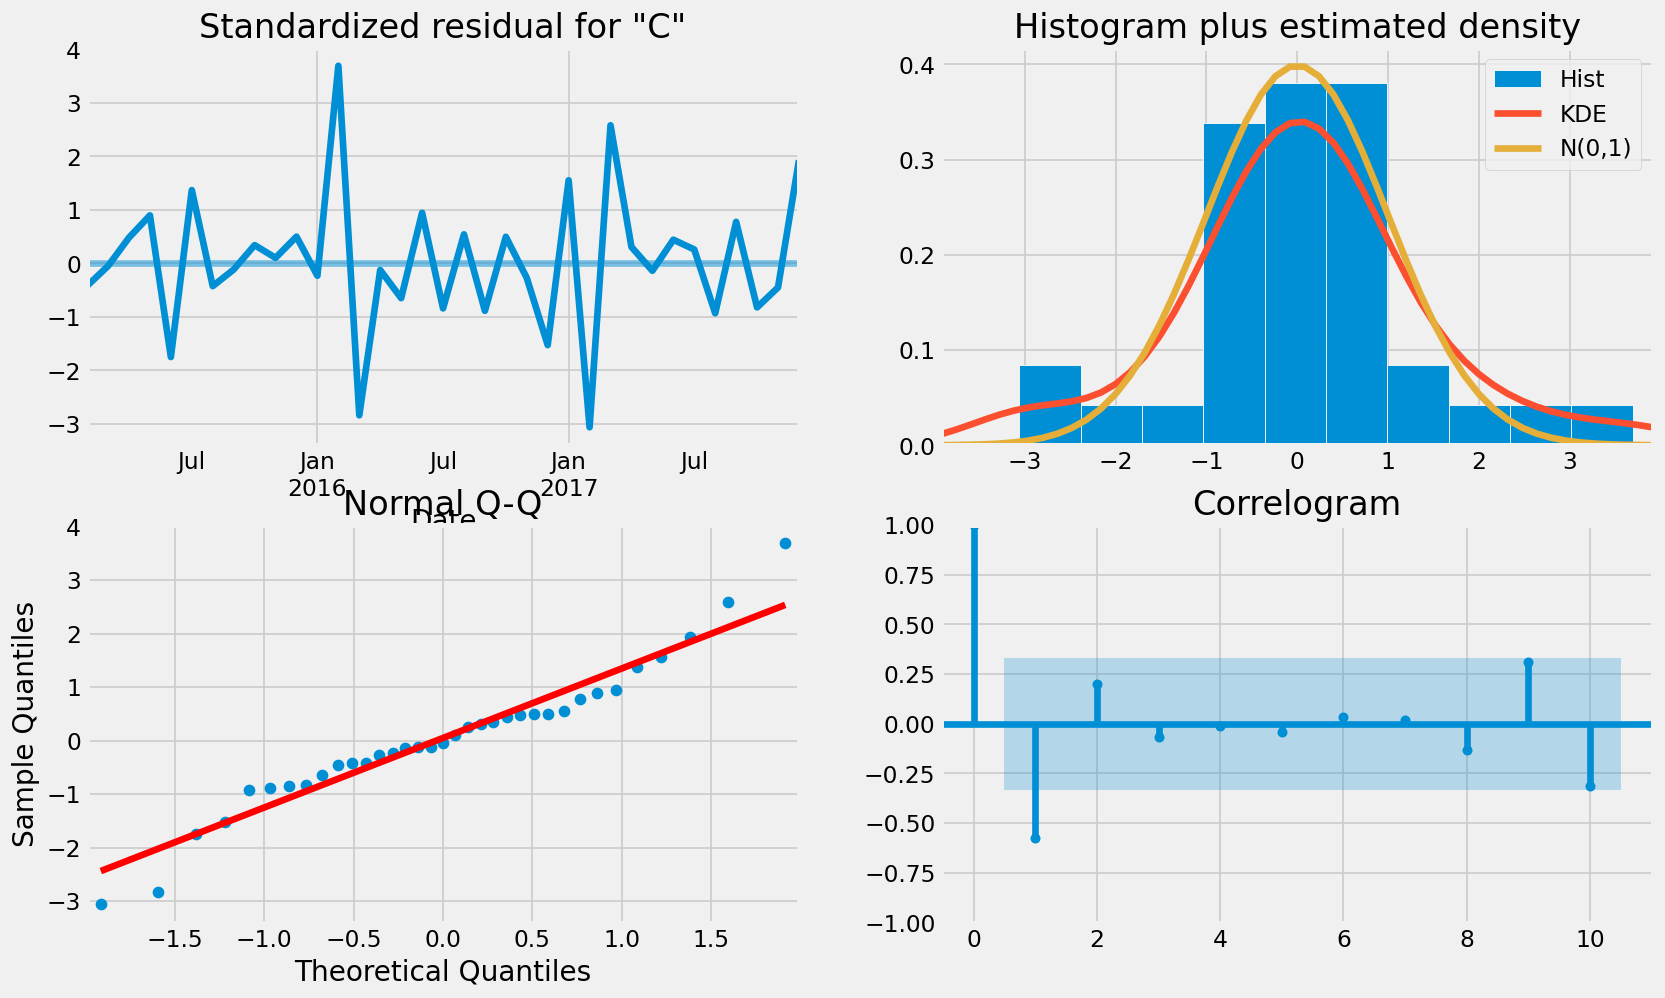

In [133]:
residuals = results.plot_diagnostics(figsize=(15,9))

- Our primary concern is to ensure that the residuals of our model are
    - uncorrelated and
    - normally distributed with zero-mean.
    
- If the seasonal ARIMA model does not satisfy these properties, it is a good indication that it can be further improved.

- In this case, our model diagnostics suggests that the model residuals are normally distributed. Plus more observations as follows:-

    - In the top right plot, we see that the red KDE line really does not follow closely with the N(0,1) line (where N(0,1)) is the standard notation for a normal distribution with mean 0 and standard deviation of 1). Hence the residual plots are not perfectly normally distributed.
    
    - The qq-plot on the bottom left shows that the moderately ordered distribution of residuals (blue dots) follows the linear trend of the samples taken from a standard normal distribution with N(0, 1). Again, this is not really a strong indication that the residuals are normally distributed.
       
Those observations lead us to conclude that our model produces a satisfactory fit that could help us understand our time series data and forecast future values.

> Although we have a satisfactory fit, some parameters of our seasonal ARIMA model could be changed to improve our model fit. For example, our grid search only considered a restricted set of parameter combinations, so we may find better models if we widened the grid search.

### Validating Forecasts

I have obtained a model for our time series that can now be used to produce forecasts.

I start by comparing predicted values to real values of the time series, which will help us understand the accuracy of our forecasts.

The __get_prediction()__ and __conf_int()__ attributes allow us to obtain the values and associated confidence intervals for forecasts of the time series.

In [95]:
pred = results.get_prediction(start=pd.to_datetime('2016-12-31'), dynamic=False)

In [96]:
pred_ci = pred.conf_int()

The code above requires the forecasts to start at 31 DEC 2016.

Overall, our forecasts slightly differs with the true values, but shows an upward trend starts from the beginning of the year and captured the seasonality toward the end of the year.

## Future Improvements:

##### Here are a few other things we should try:
###### (1) Change the start date of the dynamic forecasts to see how this affects the overall quality of our forecasts.
###### (2) Try more combinations of parameters to see if we can improve the goodness-of-fit of the model.
###### (3) Select a different metric to select the best model. For example, we used the AIC measure to find the best model, but we   could seek to     optimize the out-of-sample mean square error instead.